## Global Terrorism Analysis

In [1]:
import pandas as pd
import numpy as np
import warnings
import matplotlib.pyplot as plt
import seaborn as sns
warnings.filterwarnings("ignore")

In [3]:
# Importing the dataset
gt_df = pd.read_csv('globalterrorismdb_0522dist.csv')

In [4]:
# Displaying the top 5 rows of the dataset
gt_df.head()

,eventid,iyear,imonth,iday,approxdate,extended,resolution,country,country_txt,region,...,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related
0,197000000001,1970,7,2,NaN,0,NaN,58,Dominican Republic,2,...,NaN,NaN,NaN,NaN,PGIS,0,0,0,0,NaN
1,197000000002,1970,0,0,NaN,0,NaN,130,Mexico,1,...,NaN,NaN,NaN,NaN,PGIS,0,1,1,1,NaN
2,197001000001,1970,1,0,NaN,0,NaN,160,Philippines,5,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
3,197001000002,1970,1,0,NaN,0,NaN,78,Greece,8,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
4,197001000003,1970,1,0,NaN,0,NaN,101,Japan,4,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN


In [5]:
# Displaying the shape of the dataset
print("Number of rows in the dataset:",gt_df.shape[0],"\nNumber of columns in the dataset:", gt_df.shape[1])

Number of rows in the dataset: 209706 
Number of columns in the dataset: 135


In [6]:
# Displaying the columns in the dataset
gt_df.columns

Index(['eventid', 'iyear', 'imonth', 'iday', 'approxdate', 'extended',
       'resolution', 'country', 'country_txt', 'region',
       ...
       'addnotes', 'scite1', 'scite2', 'scite3', 'dbsource', 'INT_LOG',
       'INT_IDEO', 'INT_MISC', 'INT_ANY', 'related'],
      dtype='object', length=135)

In [7]:
# Giving meaningful names to columns that will be useful during analysis
gt_df = gt_df.rename(columns = {'iyear':'Year', 'imonth':'Month', 'iday':'Day', 'country_txt':'Country', 
                                'region_txt':'Region', 'provstate':'State', 'city':'City', 'attacktype1_txt':'Attack_type', 
                                'targtype1_txt':'Target_type', 'targsubtype1_txt':'Target_subtype', 'gname':'Gang_name', 
                                'weaptype1_txt':'Weapon_type', 'extended':'Extended_24hrs', 'vicinity':'Vicinity', 
                                'latitude':'Latitude', 'longitude':'Longitude', 'doubtterr':'Doubt_Terrorism_Act', 
                                'summary':'Summary', 'alternative_txt':'Alternative', 'multiple':'Multiple_Incident', 
                                'success':'Success_Attack', 'suicide':'Suicide_Attack', 'nkill':'Number_Killed_Victims', 
                                'nwound':'Number_Wounded_Victims', 'nkillter':'Number_Killed_Terrorists',
                                'nwoundte':'Number_Wounded_Terrorists', 'property':'Is_Property_Damaged',
                                'propextent_txt':'Property_Damaged_Extent'})

In [8]:
# Verifying the change of names of certain columns
gt_df.head()

,eventid,Year,Month,Day,approxdate,Extended_24hrs,resolution,country,Country,region,...,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related
0,197000000001,1970,7,2,NaN,0,NaN,58,Dominican Republic,2,...,NaN,NaN,NaN,NaN,PGIS,0,0,0,0,NaN
1,197000000002,1970,0,0,NaN,0,NaN,130,Mexico,1,...,NaN,NaN,NaN,NaN,PGIS,0,1,1,1,NaN
2,197001000001,1970,1,0,NaN,0,NaN,160,Philippines,5,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
3,197001000002,1970,1,0,NaN,0,NaN,78,Greece,8,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
4,197001000003,1970,1,0,NaN,0,NaN,101,Japan,4,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN


In [8]:
updated_gt_df = gt_df[['Year', 'Month', 'Day', 'Country', 'Region', 'State', 'City', 'Attack_type', 'Target_type', 
                       'Target_subtype', 'Gang_name', 'Weapon_type', 'Extended_24hrs', 'Vicinity', 'Latitude', 
                       'Longitude', 'Doubt_Terrorism_Act', 'Summary', 'Alternative', 'Multiple_Incident', 
                       'Success_Attack', 'Suicide_Attack', 'Number_Killed_Victims', 'Number_Wounded_Victims', 
                       'Number_Killed_Terrorists', 'Number_Wounded_Terrorists', 'Is_Property_Damaged', 
                       'Property_Damaged_Extent']]

In [9]:
updated_gt_df.isnull().sum()

Year                              0
Month                             0
Day                               0
Country                           0
Region                            0
State                             0
City                            426
Attack_type                       0
Target_type                       0
Target_subtype                11839
Gang_name                         0
Weapon_type                       0
Extended_24hrs                    0
Vicinity                          0
Latitude                       4691
Longitude                      4692
Doubt_Terrorism_Act               0
Summary                       66120
Alternative                  174457
Multiple_Incident                 1
Success_Attack                    0
Suicide_Attack                    0
Number_Killed_Victims         12527
Number_Wounded_Victims        19936
Number_Killed_Terrorists      68159
Number_Wounded_Terrorists     70906
Is_Property_Damaged               0
Property_Damaged_Extent     

In [10]:
# Filling the NA entries with appropriate values for some columns and replacing identified long text to short and
# understandable text
updated_gt_df['City'] = updated_gt_df['City'].fillna('Unknown')
updated_gt_df['Target_subtype'] = updated_gt_df['Target_subtype'].fillna('Others')
updated_gt_df.replace({"Vehicle (not to include vehicle-borne explosives, i.e., car or truck bombs)": "Vehicle"}, 
                      inplace = True)
updated_gt_df['Multiple_Incident'] = updated_gt_df['Multiple_Incident'].fillna(0)

In [11]:
# Calculating the number of countries and regions that has been recognized in the dataset
total_countries = updated_gt_df['Country'].nunique()
total_regions = updated_gt_df['Region'].nunique()
print("There are a total of", total_countries,"countries and", total_regions, "regions listed in the dataset")

There are a total of 204 countries and 12 regions listed in the dataset


In [12]:
# Listing all the unique regions
print(updated_gt_df['Region'].unique())

['Central America & Caribbean' 'North America' 'Southeast Asia'
 'Western Europe' 'East Asia' 'South America' 'Eastern Europe'
 'Sub-Saharan Africa' 'Middle East & North Africa' 'Australasia & Oceania'
 'South Asia' 'Central Asia']


In [13]:
# Listing all the unique attack types
print(updated_gt_df['Attack_type'].unique())

['Assassination' 'Hostage Taking (Kidnapping)' 'Bombing/Explosion'
 'Facility/Infrastructure Attack' 'Armed Assault' 'Hijacking' 'Unknown'
 'Unarmed Assault' 'Hostage Taking (Barricade Incident)']


In [14]:
# Listing all the unique target types
print(updated_gt_df['Target_type'].unique())

['Private Citizens & Property' 'Government (Diplomatic)'
 'Journalists & Media' 'Police' 'Utilities' 'Military'
 'Government (General)' 'Airports & Aircraft' 'Business'
 'Educational Institution' 'Violent Political Party'
 'Religious Figures/Institutions' 'Unknown' 'Transportation' 'Tourists'
 'NGO' 'Telecommunication' 'Food or Water Supply'
 'Terrorists/Non-State Militia' 'Other' 'Maritime' 'Abortion Related']


In [15]:
# Calculating the total number of gangs recognized in the dataset
total_gangs = updated_gt_df['Gang_name'].nunique()
print("There are a total of", total_gangs, "gangs listed in the dataset")

There are a total of 3725 gangs listed in the dataset


In [16]:
# Listing all the unique weapon types
print(updated_gt_df['Weapon_type'].unique())

['Unknown' 'Explosives' 'Incendiary' 'Firearms' 'Chemical' 'Melee'
 'Sabotage Equipment' 'Vehicle' 'Fake Weapons' 'Radiological' 'Other'
 'Biological']


In [17]:
# Describing all the statistics for the numerical attributes in the updated dataset
updated_gt_df.describe()

,Year,Month,Day,Extended_24hrs,Vicinity,Latitude,Longitude,Doubt_Terrorism_Act,Multiple_Incident,Success_Attack,Suicide_Attack,Number_Killed_Victims,Number_Wounded_Victims,Number_Killed_Terrorists,Number_Wounded_Terrorists,Is_Property_Damaged
count,209706.000000,209706.000000,209706.000000,209706.000000,209706.000000,205015.000000,205014.000000,209706.000000,209706.000000,209706.000000,209706.000000,197179.000000,189770.000000,141547.000000,138800.000000,209706.000000
mean,2004.800993,6.455285,15.527930,0.051525,0.068854,23.358696,30.416738,-0.423593,0.145899,0.883628,0.035469,2.431030,3.085872,0.559122,0.137759,-0.712927
std,13.519321,3.387098,8.801104,0.221066,0.281308,18.137061,56.113029,2.305025,0.353006,0.320672,0.184962,11.340882,40.916175,4.262644,1.560821,3.288812
min,1970.000000,0.000000,0.000000,0.000000,-9.000000,-53.154613,-176.176447,-9.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-9.000000
25%,1992.000000,4.000000,8.000000,0.000000,0.000000,11.510046,8.748117,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,2012.000000,6.000000,15.000000,0.000000,0.000000,31.300213,43.746215,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,2015.000000,9.000000,23.000000,0.000000,0.000000,34.557022,68.835918,0.000000,0.000000,1.000000,0.000000,2.000000,2.000000,0.000000,0.000000,1.000000
max,2020.000000,12.000000,31.000000,1.000000,1.000000,74.633553,179.366667,1.000000,1.000000,1.000000,1.000000,1700.000000,10878.000000,500.000000,200.000000,1.000000


In [18]:
updated_gt_df_old = updated_gt_df[updated_gt_df['Year']<2000]
updated_gt_df_new = updated_gt_df[updated_gt_df['Year']>=2000]

In [19]:
# Calculating the number of gangs present from 1970 - 2000 and from 2000 - 2020
print("Number of gangs before the year 2000:", updated_gt_df_old['Gang_name'].nunique())
print("Number of gangs after the year 2000:", updated_gt_df_new['Gang_name'].nunique())
print("Number of gangs present before and after the year 2000:", 
      updated_gt_df_old['Gang_name'].nunique() + updated_gt_df_new['Gang_name'].nunique() - 
      updated_gt_df['Gang_name'].nunique())
print("\nThere has been a noticeable reduction in the number of gangs from before the year 2000 to after the year 2000")

Number of gangs before the year 2000: 2337
Number of gangs after the year 2000: 1686
Number of gangs present before and after the year 2000: 298

There has been a noticeable reduction in the number of gangs from before the year 2000 to after the year 2000


In [20]:
# Listing the top 10 affected countries before the year 2000
updated_gt_df_old['Country'].value_counts().head(10)

Colombia          6203
Peru              6023
El Salvador       5320
United Kingdom    4173
India             3042
Spain             2828
Turkey            2489
United States     2364
Chile             2270
France            2248
Name: Country, dtype: int64

In [21]:
# Listing the top 10 affected countries after the year 2000
updated_gt_df_new['Country'].value_counts().head(10)

Iraq           27360
Afghanistan    18796
Pakistan       13687
India          10887
Philippines     6283
Yemen           5920
Nigeria         5469
Somalia         5148
Thailand        3975
Syria           2851
Name: Country, dtype: int64

<AxesSubplot: title={'center': 'Attacks by Country'}, xlabel='Countries', ylabel='Count'>

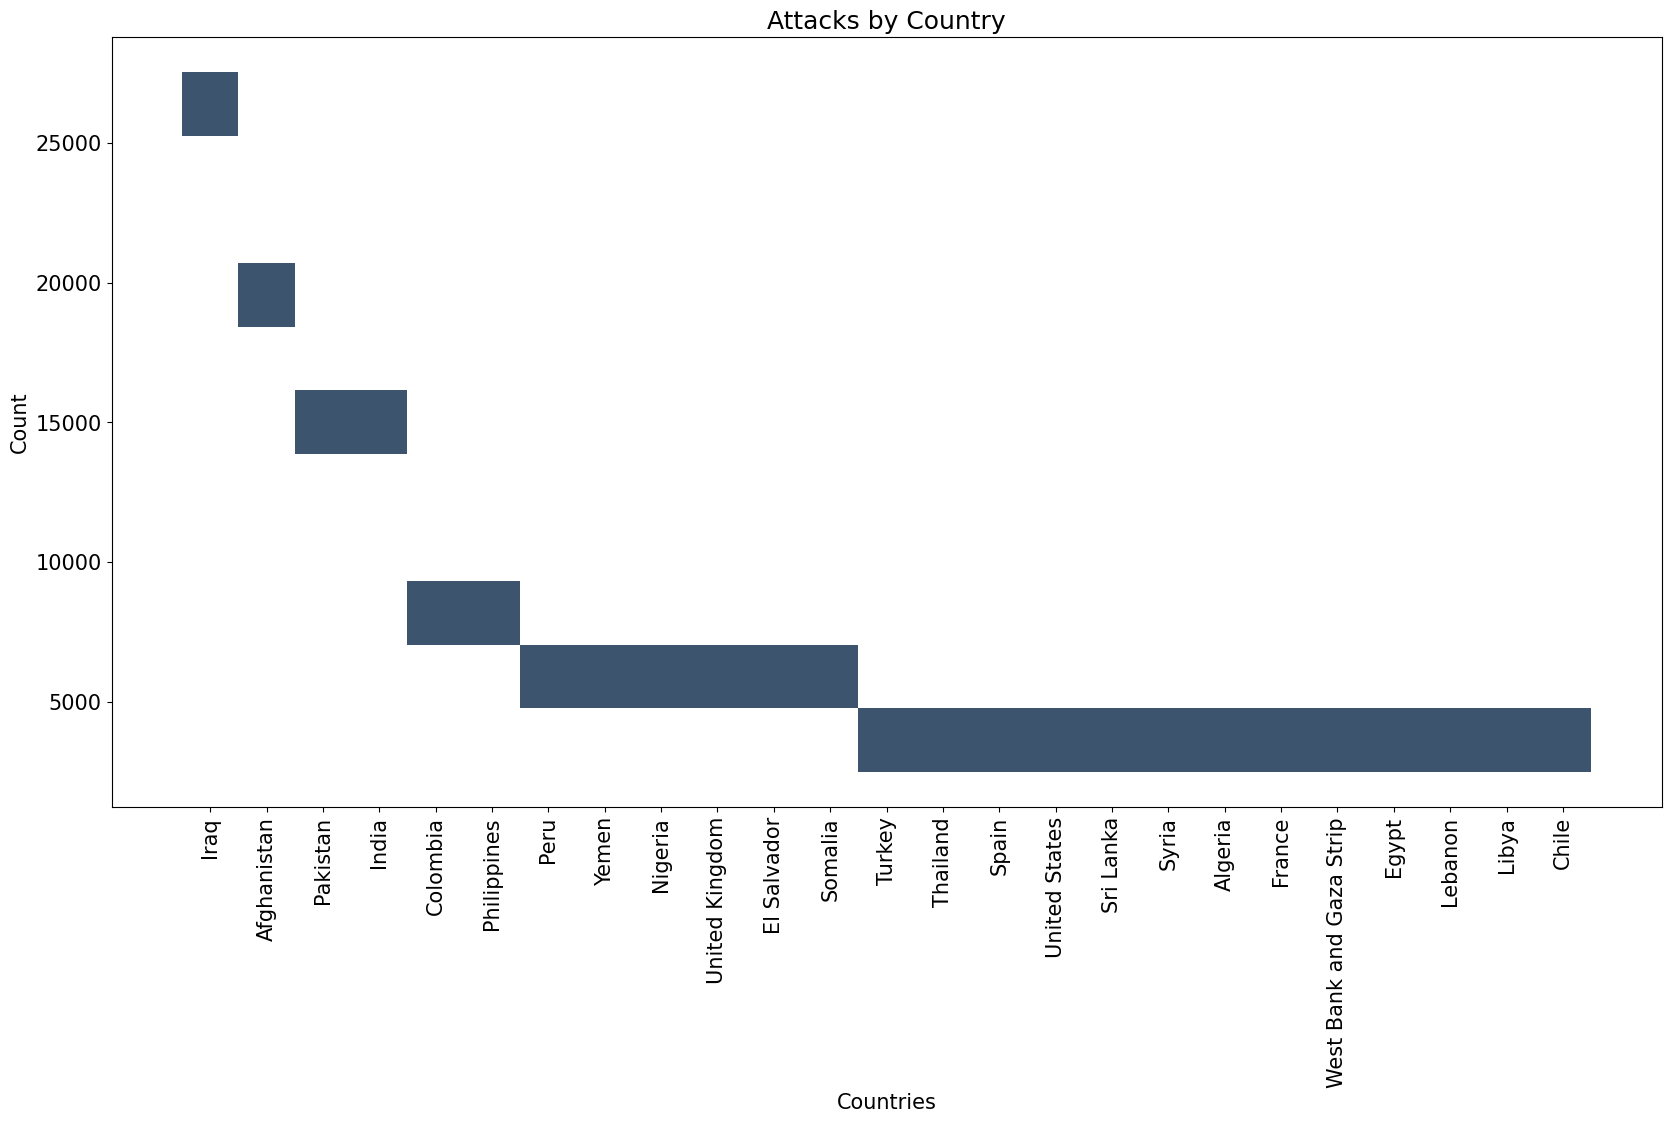

In [22]:
# Plotting the top 25 countries that have the most terrorism acts as recorded from the year 1970 to 2020
plt.figure(figsize = (20,10))
plt.rcParams.update({'font.size' : 15})
plt.xticks(rotation = 90)
plt.title('Attacks by Country')
temp_df = updated_gt_df['Country'].value_counts().head(25)
list1 = temp_df.index
list2 = temp_df.values
df = pd.DataFrame(list(zip(list1, list2)), columns = ['Countries', 'Count'])
sns.histplot(data = df, x = 'Countries', y = 'Count', element = 'bars')

In [23]:
# Listing the top 10 affected regions before the year 2000
updated_gt_df_old['Region'].value_counts().head(10)

South America                  16470
Western Europe                 13437
Central America & Caribbean    10255
Middle East & North Africa      9396
South Asia                      7760
Sub-Saharan Africa              4506
Southeast Asia                  2922
North America                   2811
Eastern Europe                  1131
East Asia                        604
Name: Region, dtype: int64

In [24]:
# Listing the top 10 affected countries after the year 2000
updated_gt_df_new['Region'].value_counts().head(10)

Middle East & North Africa    48856
South Asia                    46965
Sub-Saharan Africa            19240
Southeast Asia                11576
Eastern Europe                 4195
Western Europe                 3891
South America                  3376
North America                  1036
Central Asia                    245
East Asia                       243
Name: Region, dtype: int64

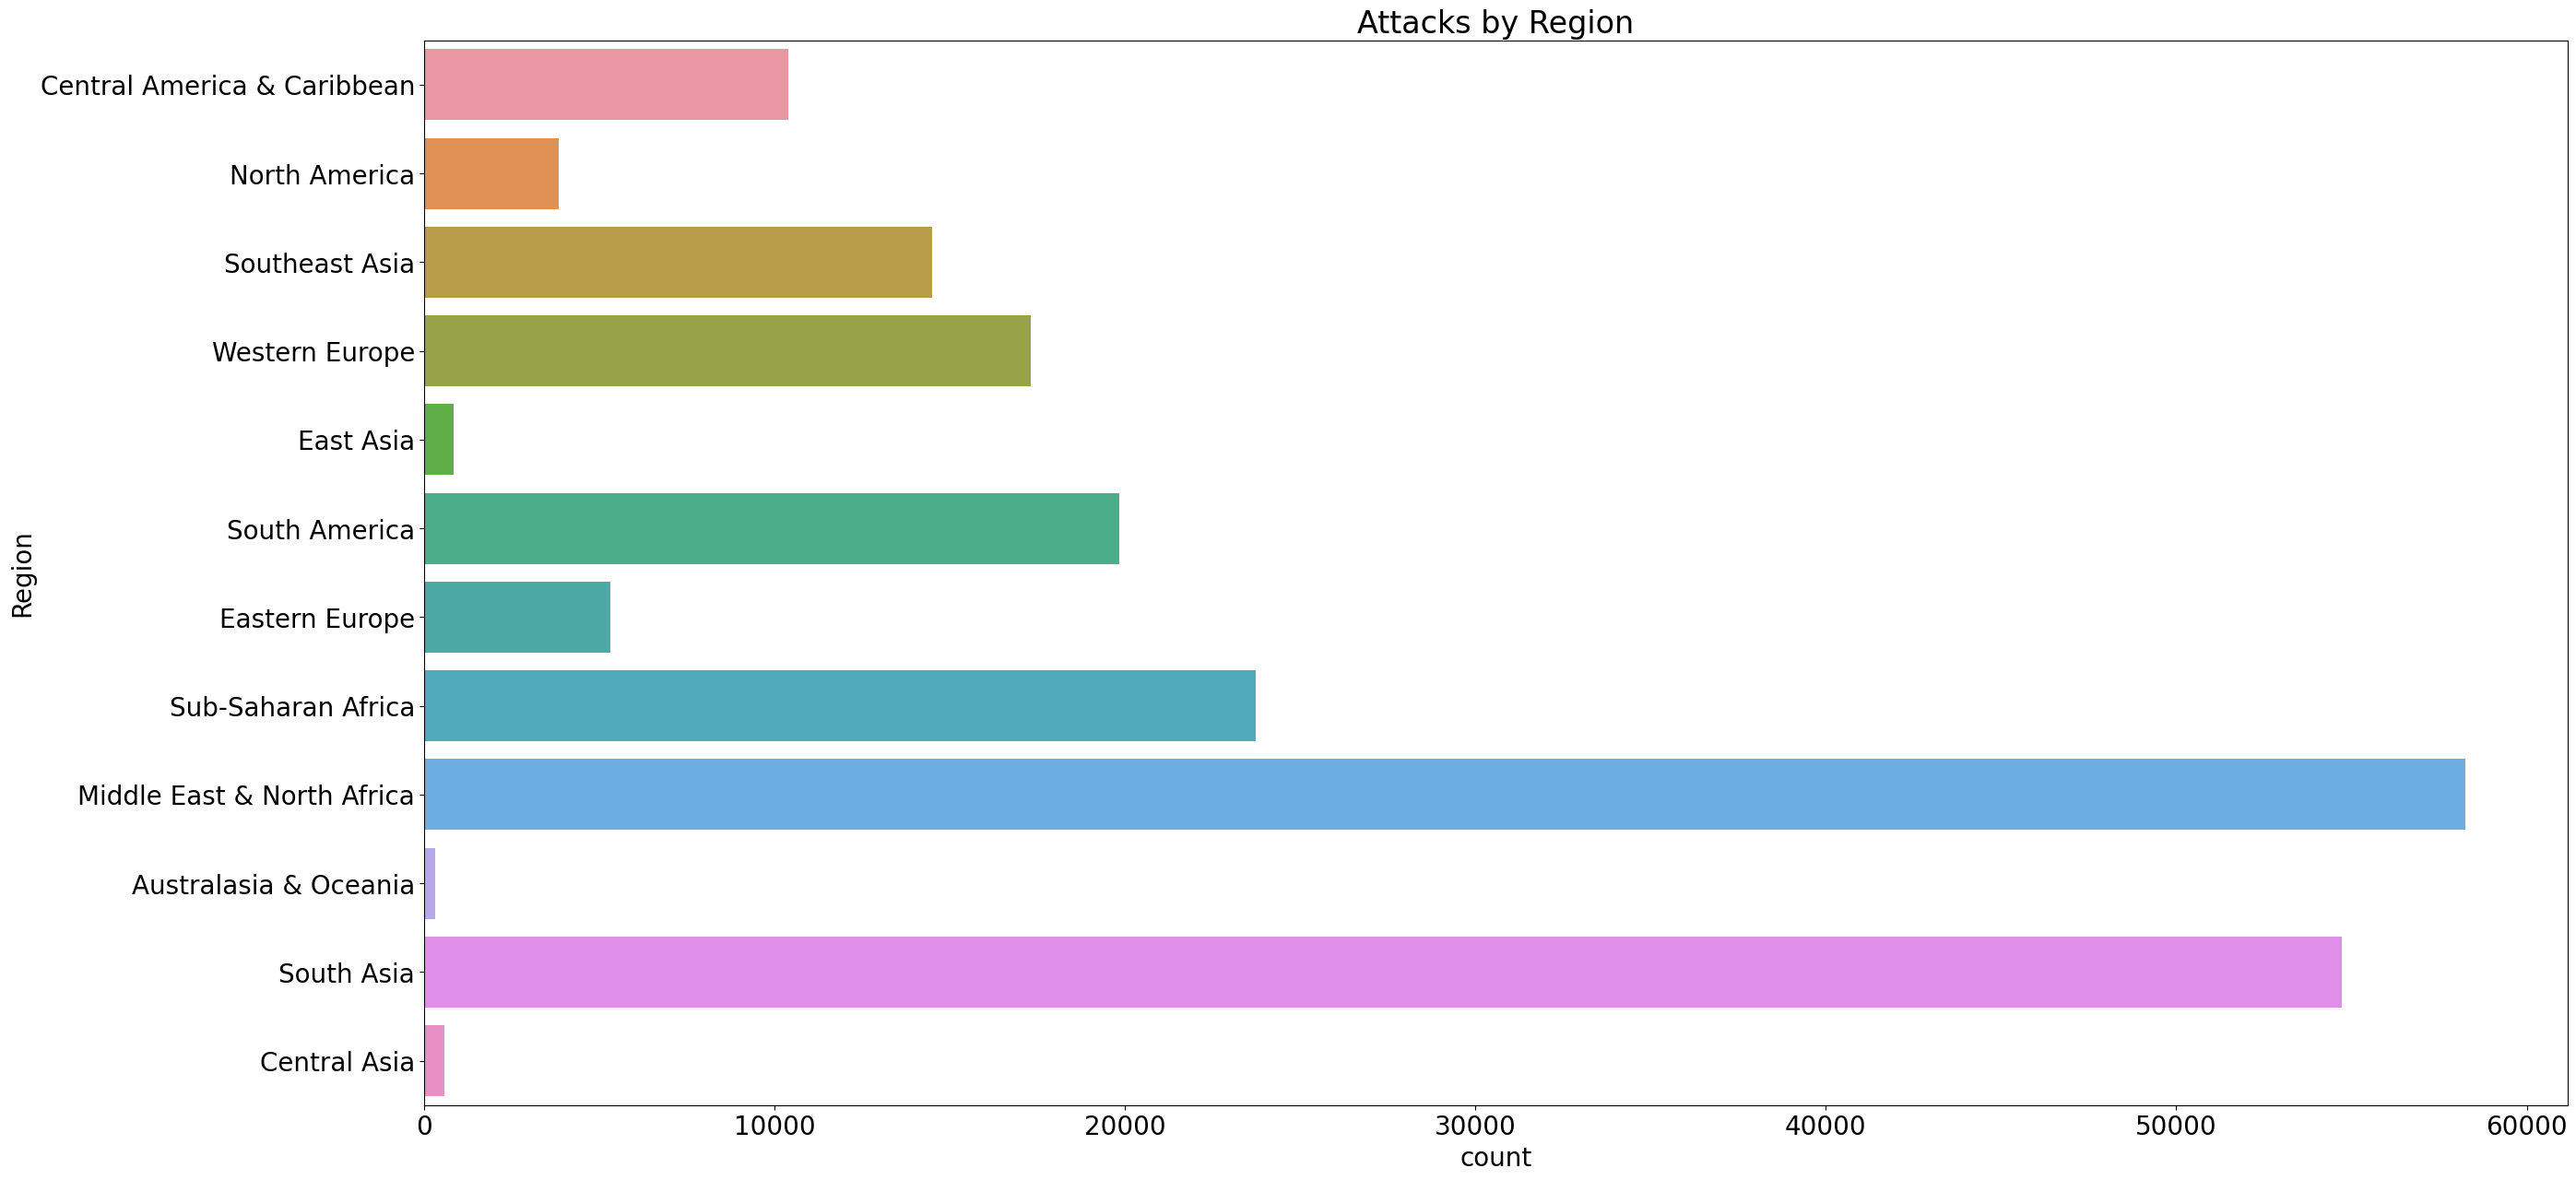

In [25]:
# Plotting the regions against the number of terrorism acts recorded from the year 1970 to 2020
plt.figure(figsize = (30,15))
plt.rcParams.update({'font.size' : 20});
plt.xticks(rotation = 0)
plt.title('Attacks by Region')
sns.countplot(y = updated_gt_df.Region);

In [26]:
# Listing the top 10 affected states before the year 2000
updated_gt_df_old['State'].value_counts().head(10)

Northern Ireland         3622
Unknown                  3489
Lima                     2603
San Salvador             1925
Antioquia                1631
Santiago Metropolitan    1582
Sindh                    1247
Punjab                   1194
Basque Country           1193
Corsica                  1101
Name: State, dtype: int64

In [27]:
# Listing the top 10 affected states after the year 2000
updated_gt_df_new['State'].value_counts().head(10)

Baghdad                                8037
Balochistan                            4038
Saladin                                3855
Diyala                                 3670
Khyber Pakhtunkhwa                     3619
Al Anbar                               3567
Nineveh                                3503
Jammu and Kashmir                      2521
Federally Administered Tribal Areas    2411
Kirkuk                                 2123
Name: State, dtype: int64

In [28]:
# Listing the top 10 affected cities before the year 2000
updated_gt_df_old['City'].value_counts().head(10)

Unknown         4880
Lima            2351
Belfast         1853
San Salvador    1560
Santiago        1557
Karachi         1122
Bogota           861
Beirut           855
Istanbul         840
Medellin         804
Name: City, dtype: int64

In [29]:
# Listing the top 10 affected cities after the year 2000
updated_gt_df_new['City'].value_counts().head(10)

Baghdad      7970
Unknown      6613
Mosul        2327
Mogadishu    1864
Karachi      1601
Kabul        1026
Kirkuk       1018
Benghazi      860
Quetta        858
Baqubah       757
Name: City, dtype: int64

It can be seen from the above statistics that before the year 2000, South American and Europe regions contributed the most towards Global Terrorism whereas after the year 2000, the Middle East and North Africa as well as South Asia has experienced prominent terrorism.

In [30]:
# Listing the top 10 chosen attacking modes before the year 2000
updated_gt_df_old['Attack_type'].value_counts().head(10)

Bombing/Explosion                      29354
Armed Assault                          16254
Assassination                          12363
Facility/Infrastructure Attack          4682
Hostage Taking (Kidnapping)             3129
Unknown                                 2671
Hostage Taking (Barricade Incident)      630
Unarmed Assault                          406
Hijacking                                345
Name: Attack_type, dtype: int64

In [31]:
# Listing the top 10 chosen attacking modes after the year 2000
updated_gt_df_new['Attack_type'].value_counts().head(10)

Bombing/Explosion                      68804
Armed Assault                          33299
Hostage Taking (Kidnapping)            10916
Assassination                           9176
Unknown                                 8271
Facility/Infrastructure Attack          7643
Unarmed Assault                          823
Hostage Taking (Barricade Incident)      526
Hijacking                                414
Name: Attack_type, dtype: int64

<AxesSubplot: title={'center': 'Based on Attack type'}, xlabel='Attack_type', ylabel='count'>

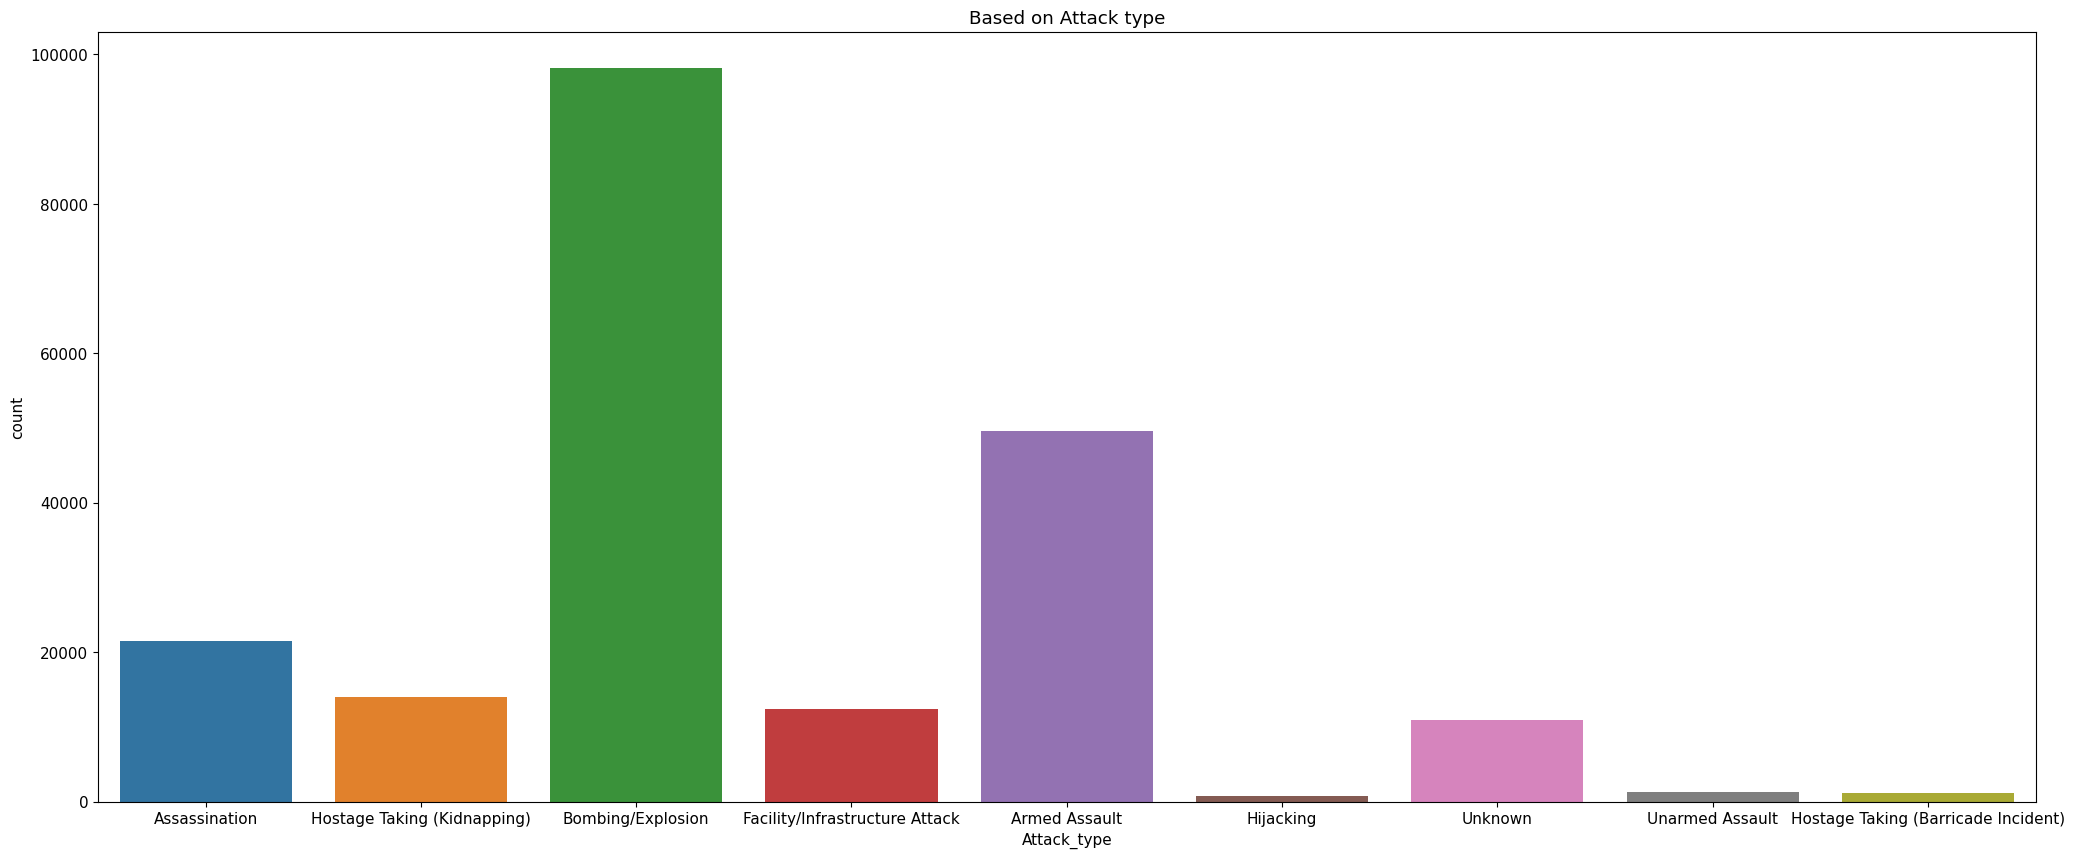

In [32]:
# Plotting the counts of attack types from the year 1970 to 2020
plt.figure(figsize = (25,10))
plt.rcParams.update({'font.size': 11})
plt.xticks(rotation = 0)
plt.title('Based on Attack type')
sns.countplot(x = updated_gt_df.Attack_type)

Bombings/Explosions and Armed Assault are the most preferred attacking modes used by terrorists. This has been the trend observed before and after the year 2000.

In [33]:
# Listing the top 10 target types that were attacked before the year 2000
updated_gt_df_old['Target_type'].value_counts().head(10)

Private Citizens & Property    12902
Business                       11701
Military                        9469
Government (General)            9067
Police                          7844
Utilities                       3701
Transportation                  3652
Government (Diplomatic)         2287
Journalists & Media             1540
Educational Institution         1373
Name: Target_type, dtype: int64

In [34]:
# Listing the top 10 target types that were attacked after the year 2000
updated_gt_df_new['Target_type'].value_counts().head(10)

Private Citizens & Property       39083
Military                          24662
Police                            20724
Government (General)              14761
Business                          10468
Unknown                            6335
Religious Figures/Institutions     3753
Transportation                     3521
Educational Institution            3388
Terrorists/Non-State Militia       3005
Name: Target_type, dtype: int64

<AxesSubplot: title={'center': 'Attacks on Target Types'}, xlabel='count', ylabel='Target_type'>

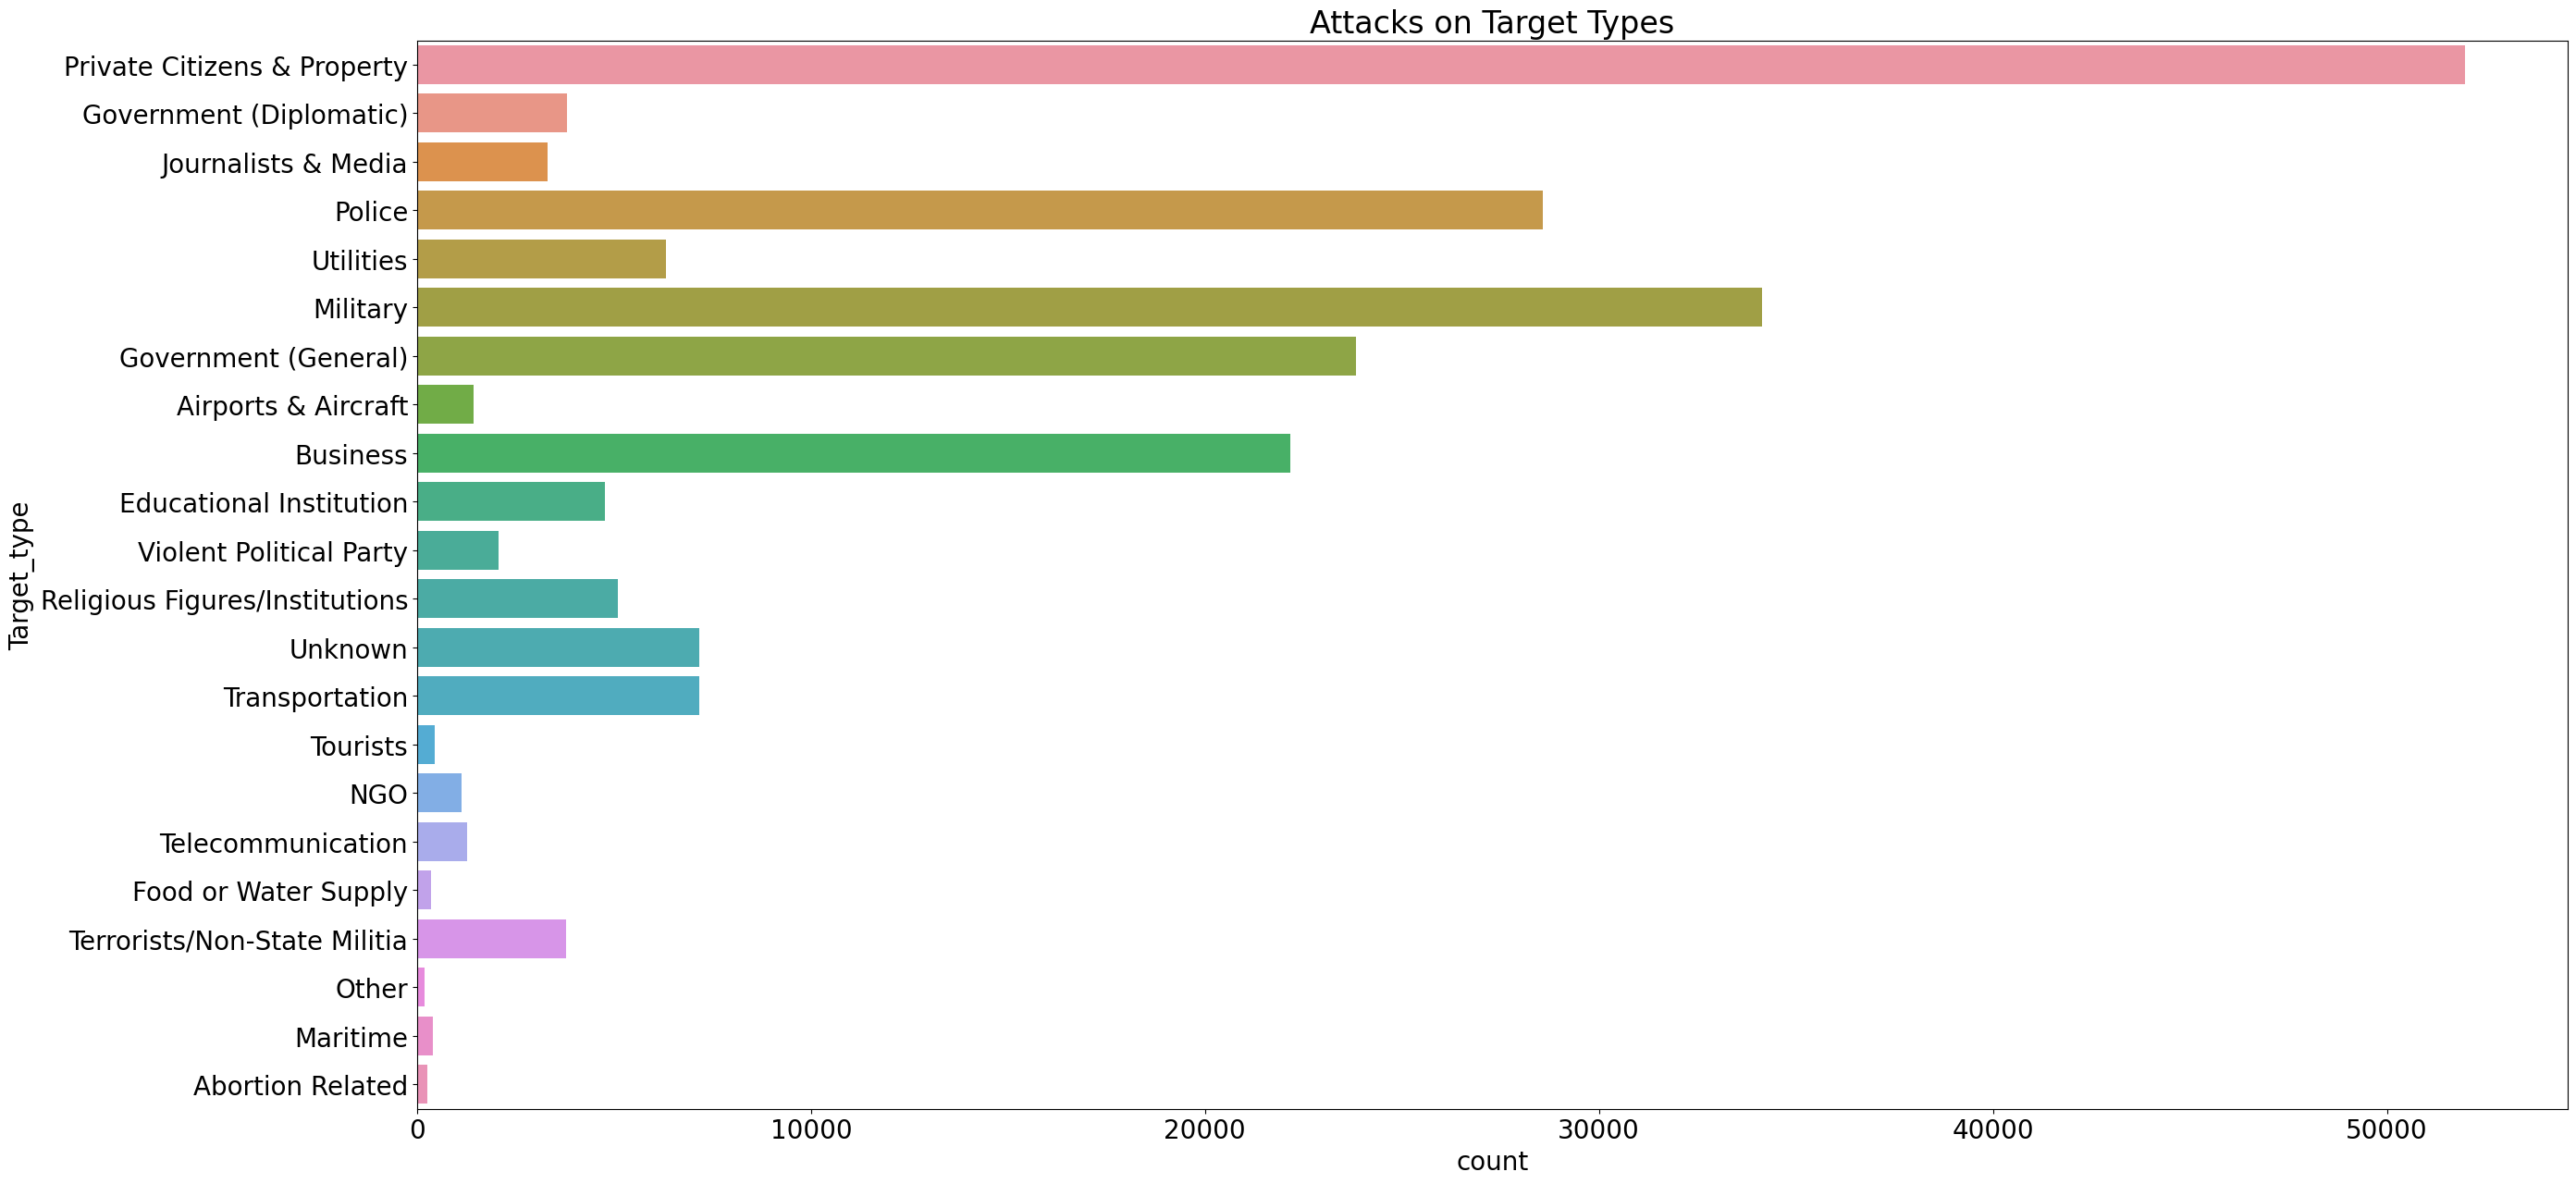

In [35]:
# Plotting the counts of target types from the year 1970 to 2020
plt.figure(figsize = (30,15))
plt.rcParams.update({'font.size' : 20})
plt.xticks(rotation = 0)
plt.title('Attacks on Target Types')
sns.countplot(y = updated_gt_df.Target_type)

Private Citizens & Property, Military, Police and the Government are the most targeted types.

In [36]:
# Listing the top 10 gang names who were in surface before the year 2000
updated_gt_df_old['Gang_name'].value_counts().head(10)

Unknown                                             24317
Shining Path (SL)                                    4501
Farabundo Marti National Liberation Front (FMLN)     3351
Irish Republican Army (IRA)                          2655
Basque Fatherland and Freedom (ETA)                  1788
Revolutionary Armed Forces of Colombia (FARC)        1249
National Liberation Army of Colombia (ELN)           1145
Palestinians                                         1100
Kurdistan Workers' Party (PKK)                       1072
Liberation Tigers of Tamil Eelam (LTTE)              1023
Name: Gang_name, dtype: int64

In [37]:
# Listing the top 10 gang names who were in surface after the year 2000
updated_gt_df_new['Gang_name'].value_counts().head(10)

Unknown                                           67589
Taliban                                           11978
Islamic State of Iraq and the Levant (ISIL)        7254
Al-Shabaab                                         4419
Boko Haram                                         3320
Houthi extremists (Ansar Allah)                    3196
New People's Army (NPA)                            2417
Communist Party of India - Maoist (CPI-Maoist)     2093
Maoists                                            2073
Kurdistan Workers' Party (PKK)                     1510
Name: Gang_name, dtype: int64

<AxesSubplot: title={'center': 'Attacks by Gang_name'}, xlabel='Count', ylabel='Gang Names'>

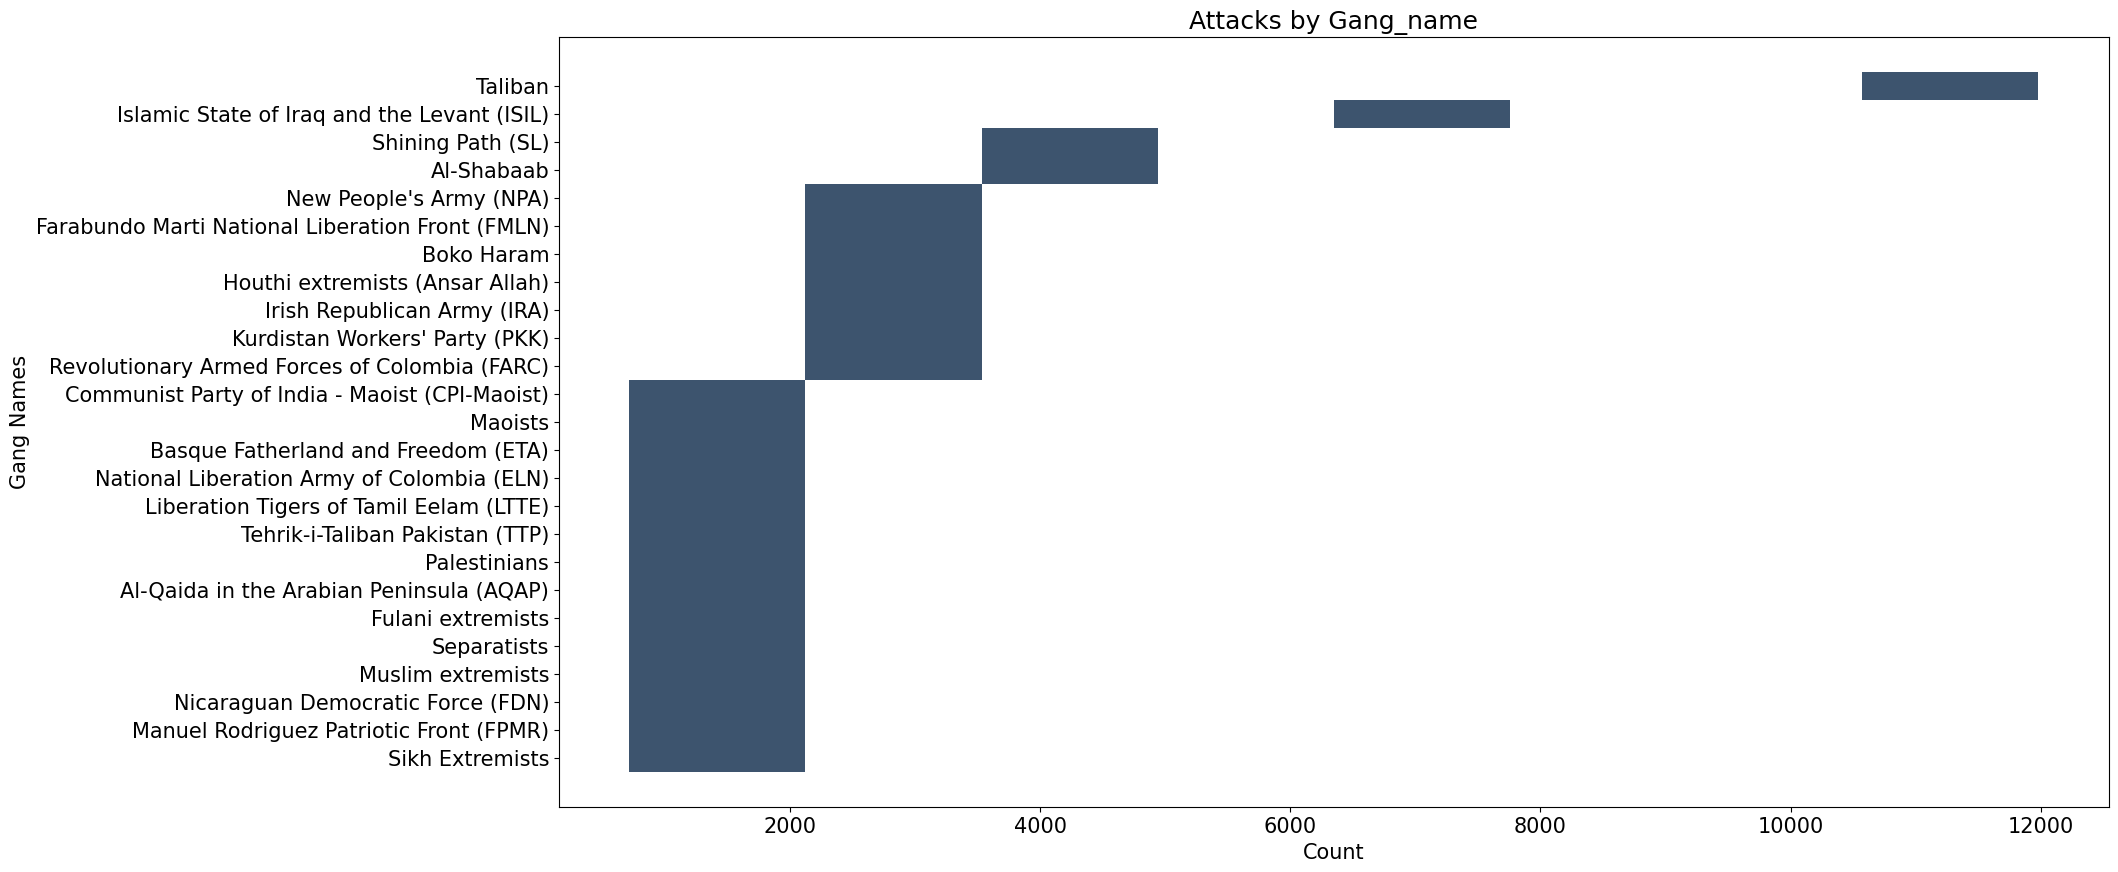

In [38]:
# Plotting the top 25 gangs that has committed the most terrorism acts as recorded from the year 1970 to 2020
plt.figure(figsize = (20,10))
plt.rcParams.update({'font.size' : 15})
plt.xticks(rotation = 0)
plt.title('Attacks by Gang_name')
temp_df = updated_gt_df['Gang_name'].value_counts().head(26)
list1 = temp_df.index[1:]
list2 = temp_df.values[1:]
df = pd.DataFrame(list(zip(list1, list2)), columns = ['Gang Names', 'Count'])
sns.histplot(data = df, x = 'Count', y = 'Gang Names', element = 'bars')

Most of the terrorism acts haven't been categorized into any of the gangs maybe because it was unknown. From the terrorism acts that have been assigned a gang, Taliban has dominated other gangs in the number of crimes committed.

In [39]:
# Listing the top 10 used weapons before the year 2000
updated_gt_df_old['Weapon_type'].value_counts().head(10)

Explosives            29545
Firearms              25891
Unknown                6720
Incendiary             5909
Melee                  1512
Chemical                114
Other                    43
Sabotage Equipment       38
Vehicle                  29
Fake Weapons             22
Name: Weapon_type, dtype: int64

In [40]:
# Listing the top 10 used weapons after the year 2000
updated_gt_df_new['Weapon_type'].value_counts().head(10)

Explosives            73930
Firearms              41757
Unknown               13483
Incendiary             7224
Melee                  2795
Chemical                233
Vehicle                 157
Sabotage Equipment      149
Other                    93
Biological               28
Name: Weapon_type, dtype: int64

<AxesSubplot: title={'center': 'Weapons Count'}, xlabel='count', ylabel='Weapon_type'>

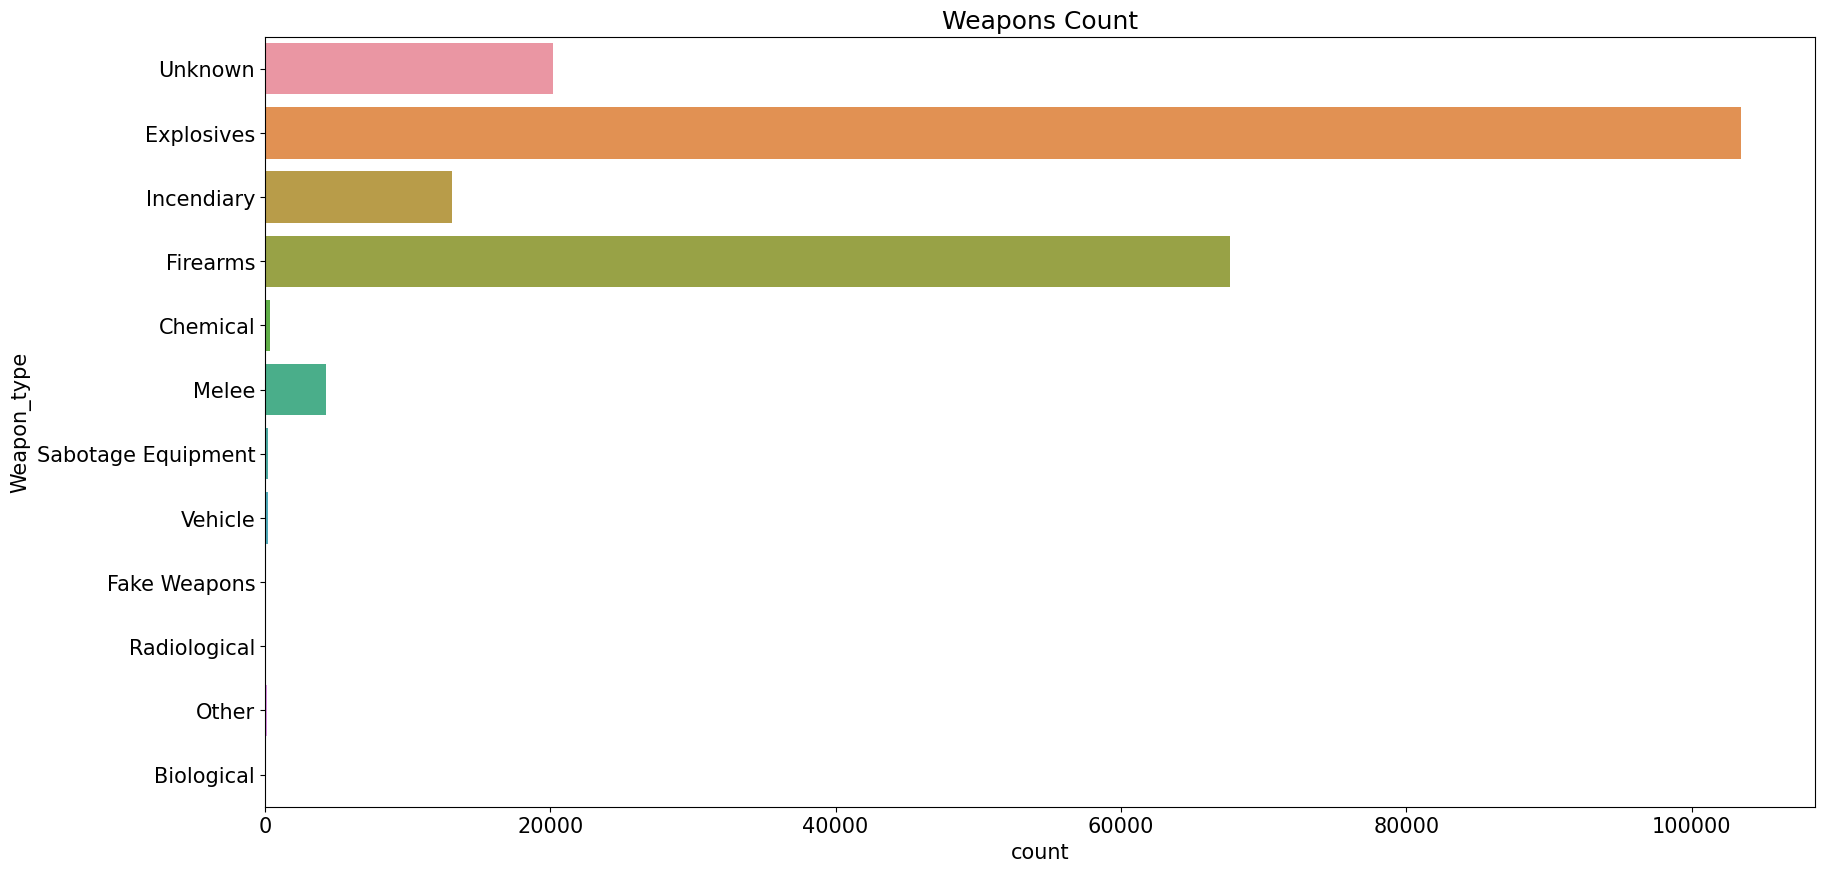

In [83]:
# Plotting the counts of weapon types from the year 1970 to 2020
plt.figure(figsize = (20,10))
plt.xticks(rotation = 0)
plt.title("Weapons Count")
sns.countplot(y = updated_gt_df.Weapon_type)

Explosives and firearms are the weapons most used by the terrorists.

<AxesSubplot: title={'center': 'Attacks by Year'}, xlabel='Year', ylabel='count'>

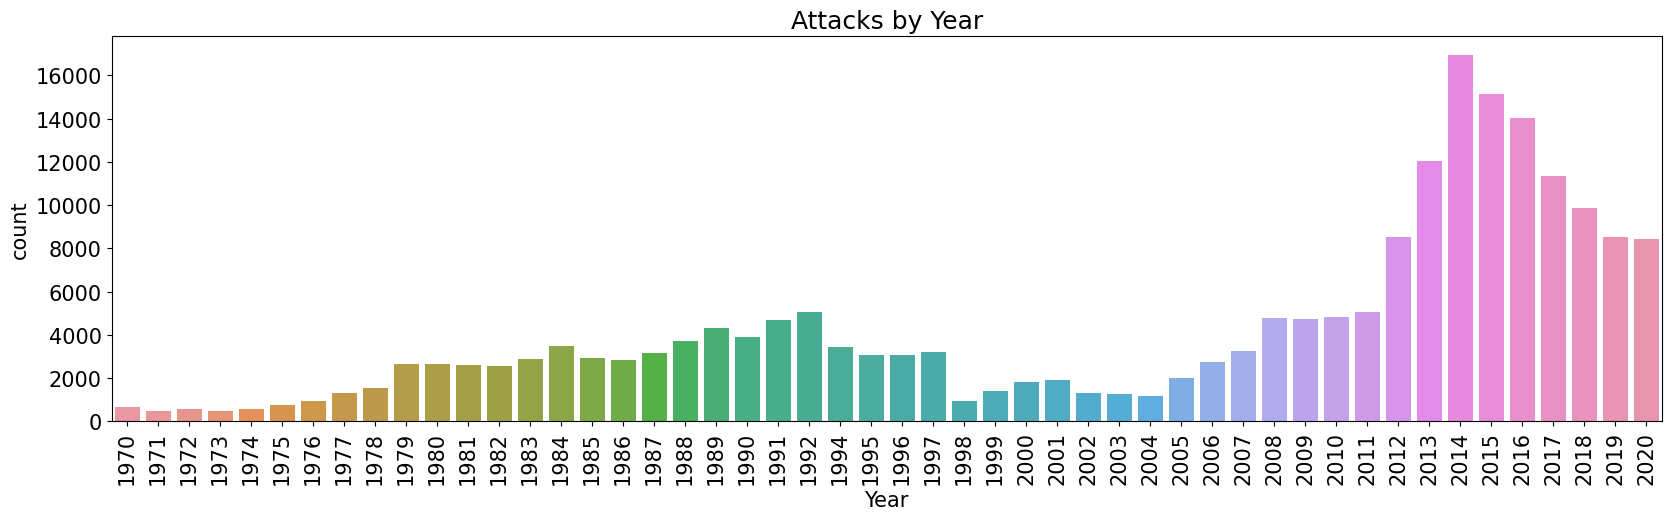

In [42]:
# Plotting the number of terrorism acts recorded in each year from 1970 to 2020
plt.figure(figsize=(20,5))
plt.xticks(rotation = 90)
plt.title('Attacks by Year')
sns.countplot(x = updated_gt_df.Year)

2014 is the year which has recorded the most terrorism acts. After 2014, the terrorism acts have been reducing.

<AxesSubplot: title={'center': 'Attacks by Month'}, xlabel='Month', ylabel='count'>

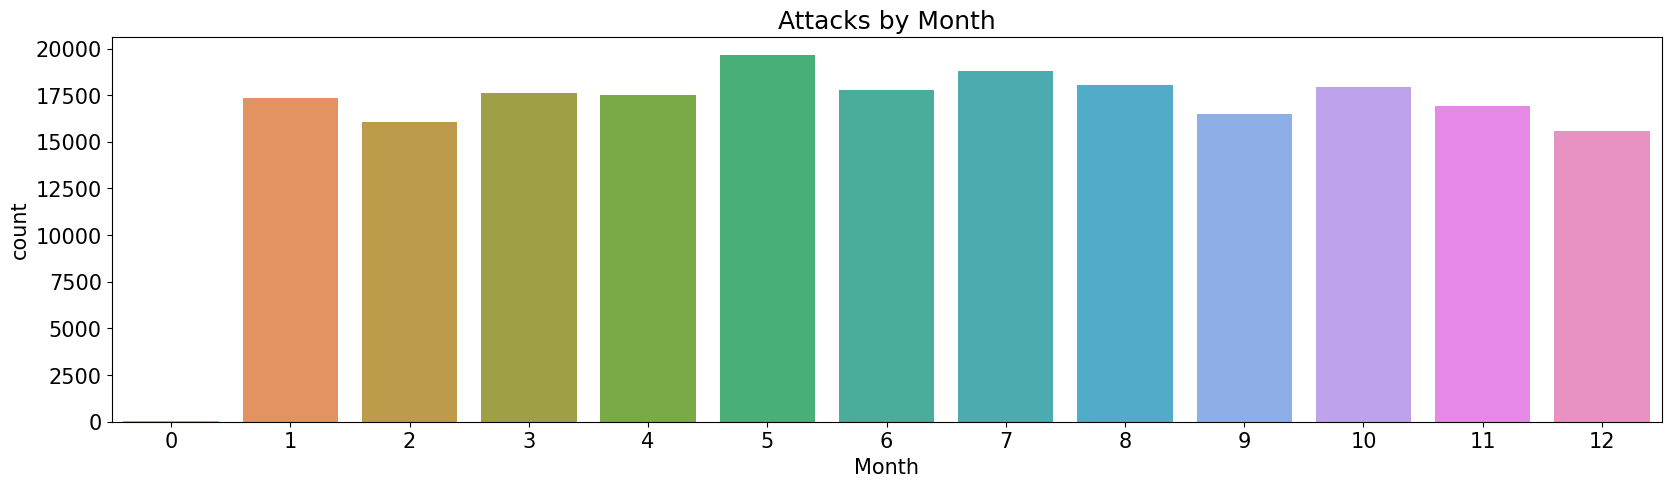

In [43]:
# Plotting the number of terrorism acts recorded in each month from the year 1970 to 2020
plt.figure(figsize = (20,5))
plt.title('Attacks by Month')
sns.countplot(x = updated_gt_df.Month)

Every month records almost the same terrorism acts.

<AxesSubplot: title={'center': 'Attacks by Day'}, xlabel='Day', ylabel='count'>

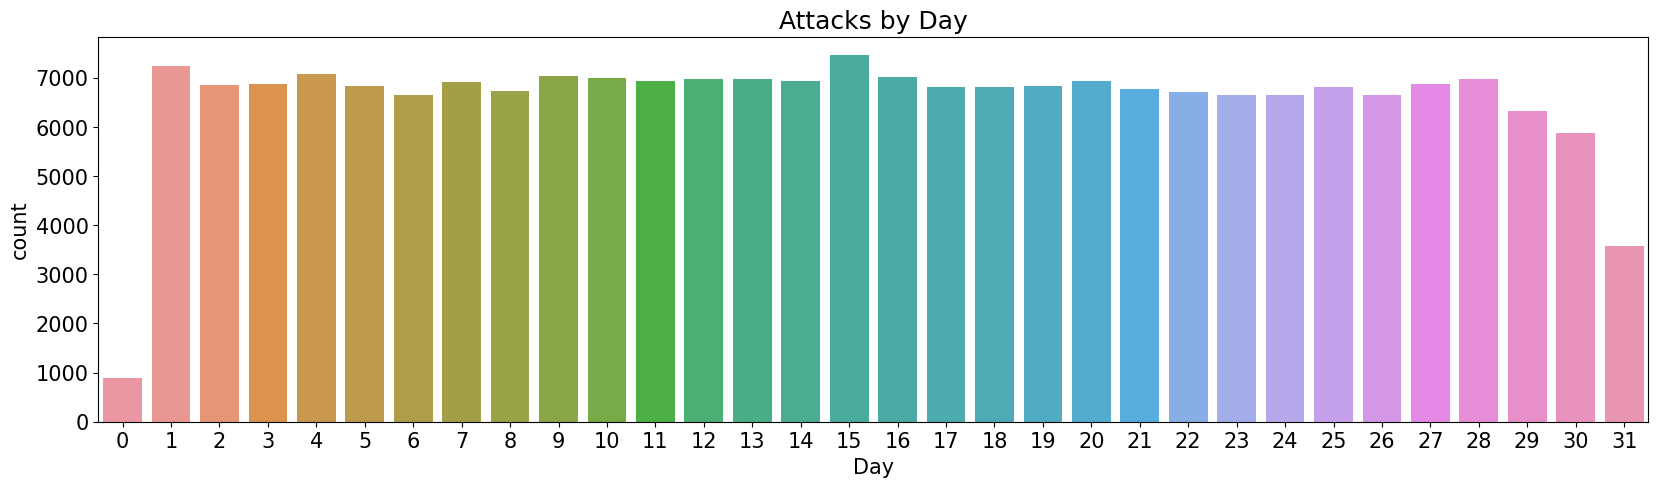

In [44]:
# Plotting the number of terrorism acts recorded in each day from the year 1970 to 2020
plt.figure(figsize = (20,5))
plt.title('Attacks by Day')
sns.countplot(x = updated_gt_df.Day)

Almost every day has the same contribution towards Global Terrorism but attacks recorded are low on 31st and high on 1st and 15th of every month.

In [45]:
from shapely.geometry import Point
import geopandas as gpd
from geopandas import GeoDataFrame

geometry_old = [Point(xy) for xy in zip(updated_gt_df_old['Longitude'], updated_gt_df_old['Latitude'])]
gdf_old = GeoDataFrame(updated_gt_df_old, geometry = geometry_old)

<AxesSubplot: >

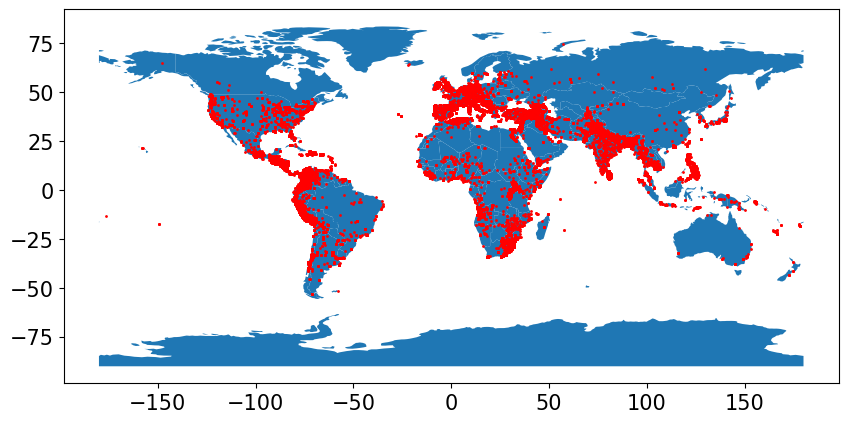

In [46]:
# Plotting the latitudes and Longitudes of the location of the terrorism acts committed before the year 2000
# on the world map
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
gdf_old.plot(ax = world.plot(figsize = (10,10)), marker = 'o', color = 'red', markersize = 1)

In [47]:
geometry_new = [Point(xy) for xy in zip(updated_gt_df_new['Longitude'], updated_gt_df_new['Latitude'])]
gdf_new = GeoDataFrame(updated_gt_df_new, geometry = geometry_new)

<AxesSubplot: >

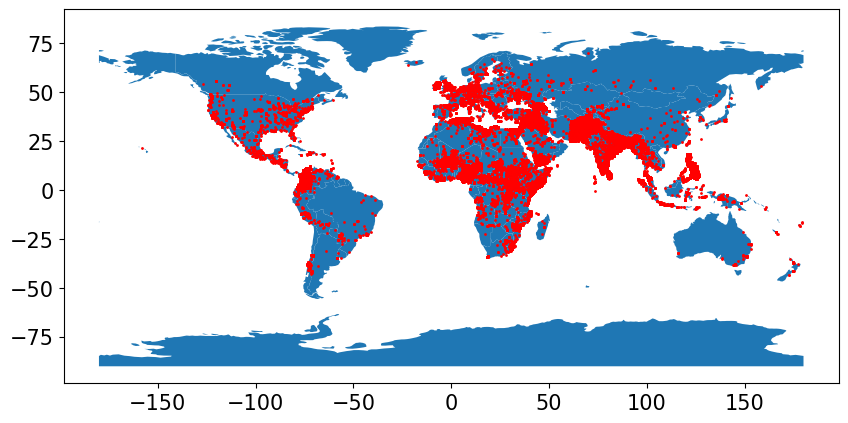

In [48]:
# Plotting the latitudes and Longitudes of the location of the terrorism acts committed after the year 2000
# on the world map
gdf_new.plot(ax = world.plot(figsize = (10,10)), marker = 'o', color = 'red', markersize = 1)

There has been a similar trend in the locations of terrorism acts before and after the year 2000. The difference that can be seen from the above two world plots is that the acts have been reduced in South American regions and it has increased in the North African region to a certain extent.

In [49]:
# Calculating the percentage of global terrorism acts that took place for more than 24 hours
extended_24hrs_percentage = updated_gt_df['Extended_24hrs'].value_counts()[1]*100/(updated_gt_df.shape[0])
print(round(extended_24hrs_percentage, 2), "% of incidents took place for more than 24 hours", sep = '')

5.15% of incidents took place for more than 24 hours


In [50]:
# Calculating the percentage of global terrorism acts that took place in the vicinity of a city
vicinity_percentage_1 = updated_gt_df['Vicinity'].value_counts()[1] * 100
vicinity_percentage_2 = updated_gt_df['Vicinity'].value_counts()[1] + updated_gt_df['Vicinity'].value_counts()[0]
vicinity_percentage = vicinity_percentage_1 / vicinity_percentage_2
print(round(vicinity_percentage, 2), "% of incidents took place in the vicinity of a city rather than within the city", sep = '')

7.04% of incidents took place in the vicinity of a city rather than within the city


In [51]:
# Calculating the percentage of incidents that have ambiguity on whether the act is a terrorist one
doubt_terr_percentage_1 = updated_gt_df['Doubt_Terrorism_Act'].value_counts()[1] * 100
doubt_terr_percentage_2 = updated_gt_df['Doubt_Terrorism_Act'].value_counts()[1] + updated_gt_df['Doubt_Terrorism_Act'].value_counts()[0]
doubt_terr_percentage = doubt_terr_percentage_1 / doubt_terr_percentage_2
print(round(doubt_terr_percentage, 2), "% of incidents are doubtful whether they can be categorized as terrorist acts", sep = '')

17.98% of incidents are doubtful whether they can be categorized as terrorist acts


In [52]:
# Calculating the percentage of global terrorism acts that are part of multiple related incidents
multiple_percentage = updated_gt_df['Multiple_Incident'].value_counts()[1]*100/(updated_gt_df.shape[0])
print(round(multiple_percentage, 2), "% of incidents are part of multiple terrorism acts", sep = '')

14.59% of incidents are part of multiple terrorism acts


In [53]:
# Calculating the percentage of global terrorism acts that were successful
success_percentage = updated_gt_df['Success_Attack'].value_counts()[1]*100/(updated_gt_df.shape[0])
print(round(success_percentage, 2), "% of incidents were successful terrorist acts", sep = '')

88.36% of incidents were successful terrorist acts


In [54]:
# Calculating the percentage of global terrorism acts that were suicidal
suicide_percentage = updated_gt_df['Suicide_Attack'].value_counts()[1]*100/(updated_gt_df.shape[0])
print(round(suicide_percentage, 2), "% of incidents were suicidal terrorist acts", sep = '')

3.55% of incidents were suicidal terrorist acts


In [55]:
# Calculating the percentage of global terrorism acts that resulted in destruction/damage to property
property_percentage_1 = updated_gt_df['Is_Property_Damaged'].value_counts()[1] * 100
property_percentage_2 = updated_gt_df['Is_Property_Damaged'].value_counts()[1] + updated_gt_df['Is_Property_Damaged'].value_counts()[0]
property_percentage = property_percentage_1 / property_percentage_2
print(round(property_percentage, 2), "% of incidents resulted in destruction/damage to property", sep = '')

56.66% of incidents resulted in destruction/damage to property


In [56]:
# Listing the extent of damaged property from the year 1970 to 2020
updated_gt_df['Property_Damaged_Extent'].value_counts()

Minor (likely < $1 million)                      50337
Unknown                                          22192
Major (likely >= $1 million but < $1 billion)      927
Catastrophic (likely >= $1 billion)                  6
7                                                    2
Name: Property_Damaged_Extent, dtype: int64

#### End of EDA

## XGBoost Algorithm to predict the Target type

In [53]:
# Importing the required libraries
from sklearn.metrics.cluster import silhouette_score
from sklearn.preprocessing import scale, robust_scale
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, confusion_matrix
import xgboost as xgb

%matplotlib inline

In [42]:
gt_target_df = gt_df

In [43]:
# Dropping all the columns which have null values percentage greater than 30
null_percentage = gt_target_df.isnull().sum() / gt_target_df.shape[0] * 100
col_to_drop = null_percentage[null_percentage > 30].keys()
gt_target_df = gt_target_df.drop(col_to_drop, axis=1)
gt_target_df.head()

,eventid,Year,Month,Day,Extended_24hrs,country,Country,region,Region,State,...,weapsubtype1_txt,Number_Killed_Victims,Number_Wounded_Victims,Is_Property_Damaged,ishostkid,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY
0,197000000001,1970,7,2,0,58,Dominican Republic,2,Central America & Caribbean,National,...,NaN,1.0,0.0,0,0.0,PGIS,0,0,0,0
1,197000000002,1970,0,0,0,130,Mexico,1,North America,Federal,...,NaN,0.0,0.0,0,1.0,PGIS,0,1,1,1
2,197001000001,1970,1,0,0,160,Philippines,5,Southeast Asia,Tarlac,...,NaN,1.0,0.0,0,0.0,PGIS,-9,-9,1,1
3,197001000002,1970,1,0,0,78,Greece,8,Western Europe,Attica,...,Unknown Explosive Type,NaN,NaN,1,0.0,PGIS,-9,-9,1,1
4,197001000003,1970,1,0,0,101,Japan,4,East Asia,Fukouka,...,NaN,NaN,NaN,1,0.0,PGIS,-9,-9,1,1


In [44]:
# Describing all the numerical attributes of the reduced dataframe
gt_target_df.describe()

,eventid,Year,Month,Day,Extended_24hrs,country,region,Latitude,Longitude,specificity,...,weaptype1,weapsubtype1,Number_Killed_Victims,Number_Wounded_Victims,Is_Property_Damaged,ishostkid,INT_LOG,INT_IDEO,INT_MISC,INT_ANY
count,2.097060e+05,209706.000000,209706.000000,209706.000000,209706.000000,209706.000000,209706.000000,205015.000000,205014.000000,209705.000000,...,209706.000000,183765.000000,197179.000000,189770.000000,209706.000000,209528.000000,209706.000000,209706.000000,209706.000000,209706.000000
mean,2.004867e+11,2004.800993,6.455285,15.527930,0.051525,130.291351,7.279854,23.358696,30.416738,1.468387,...,6.543060,11.081294,2.431030,3.085872,-0.712927,0.052967,-4.424289,-4.339318,0.086841,-3.850758
std,1.351933e+09,13.519321,3.387098,8.801104,0.221066,111.714562,2.905697,18.137061,56.113029,0.984958,...,2.296739,6.485577,11.340882,40.916175,3.288812,0.562180,4.543800,4.640302,0.536943,4.677966
min,1.970000e+11,1970.000000,0.000000,0.000000,0.000000,4.000000,1.000000,-53.154613,-176.176447,1.000000,...,1.000000,1.000000,0.000000,0.000000,-9.000000,-9.000000,-9.000000,-9.000000,-9.000000,-9.000000
25%,1.992080e+11,1992.000000,4.000000,8.000000,0.000000,69.000000,6.000000,11.510046,8.748117,1.000000,...,5.000000,5.000000,0.000000,0.000000,0.000000,0.000000,-9.000000,-9.000000,0.000000,-9.000000
50%,2.012010e+11,2012.000000,6.000000,15.000000,0.000000,98.000000,8.000000,31.300213,43.746215,1.000000,...,6.000000,11.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,2.015123e+11,2015.000000,9.000000,23.000000,0.000000,160.000000,10.000000,34.557022,68.835918,1.000000,...,6.000000,16.000000,2.000000,2.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,2.020123e+11,2020.000000,12.000000,31.000000,1.000000,1004.000000,12.000000,74.633553,179.366667,5.000000,...,13.000000,31.000000,1700.000000,10878.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [45]:
# Defining a LabelEncoder
number = LabelEncoder()

# Listing out the categorical columns from the reduced dataframe
num_cols = gt_target_df._get_numeric_data().columns
print("The categorical columns are as follows:\n", list(set(gt_target_df.columns) - set(num_cols)))

The categorical columns are as follows:
 ['target1', 'corp1', 'City', 'Target_type', 'weapsubtype1_txt', 'Region', 'Country', 'natlty1_txt', 'Attack_type', 'State', 'Weapon_type', 'Target_subtype', 'dbsource', 'Gang_name']


In [46]:
# Label Encoding all the categorical columns
gt_target_df['Gang_name'] = number.fit_transform(gt_target_df['Gang_name'].astype('str'))
gt_target_df['dbsource'] = number.fit_transform(gt_target_df['dbsource'].astype('str'))
gt_target_df['corp1'] = number.fit_transform(gt_target_df['corp1'].astype('str'))
gt_target_df['Target_type'] = number.fit_transform(gt_target_df['Target_type'].astype('str'))
gt_target_df['Country'] = number.fit_transform(gt_target_df['Country'].astype('str'))
gt_target_df['target1'] = number.fit_transform(gt_target_df['target1'].astype('str'))
gt_target_df['Region'] = number.fit_transform(gt_target_df['Region'].astype('str'))
gt_target_df['State'] = number.fit_transform(gt_target_df['State'].astype('str'))
gt_target_df['City'] = number.fit_transform(gt_target_df['City'].astype('str'))
gt_target_df['Target_subtype'] = number.fit_transform(gt_target_df['Target_subtype'].astype('str'))
gt_target_df['natlty1_txt'] = number.fit_transform(gt_target_df['natlty1_txt'].astype('str'))
gt_target_df['Attack_type'] = number.fit_transform(gt_target_df['Attack_type'].astype('str'))
gt_target_df['weapsubtype1_txt'] = number.fit_transform(gt_target_df['weapsubtype1_txt'].astype('str'))
gt_target_df['Weapon_type'] = number.fit_transform(gt_target_df['Weapon_type'].astype('str'))

In [47]:
# Dropping some of the columns as they are in direct relation with the target variable or because they have been represented
# by another variable in a different manner
gt_target_df = gt_target_df.drop(
    ['targsubtype1','Target_type','Target_subtype','Country','Region','eventid'], 
    axis=1
)

In [48]:
# Rearranging the Target type encoding definition to get 'Unknown' value as the highest value
gt_target_df.loc[gt_target_df['targtype1'] == 20, 'targtype1'] = 23
gt_target_df.loc[gt_target_df['targtype1'] == 21, 'targtype1'] = 20
gt_target_df.loc[gt_target_df['targtype1'] == 22, 'targtype1'] = 21
gt_target_df.loc[gt_target_df['targtype1'] == 23, 'targtype1'] = 22

# Converting to a zero-based indexing target variable as expected by the XGBoost Classifier
gt_target_df['targtype1'] -= 1

In [49]:
print(gt_target_df.columns)

Index(['Year', 'Month', 'Day', 'Extended_24hrs', 'country', 'region', 'State',
       'City', 'Latitude', 'Longitude', 'specificity', 'Vicinity', 'crit1',
       'crit2', 'crit3', 'Doubt_Terrorism_Act', 'Multiple_Incident',
       'Success_Attack', 'Suicide_Attack', 'attacktype1', 'Attack_type',
       'targtype1', 'corp1', 'target1', 'natlty1', 'natlty1_txt', 'Gang_name',
       'guncertain1', 'individual', 'weaptype1', 'Weapon_type', 'weapsubtype1',
       'weapsubtype1_txt', 'Number_Killed_Victims', 'Number_Wounded_Victims',
       'Is_Property_Damaged', 'ishostkid', 'dbsource', 'INT_LOG', 'INT_IDEO',
       'INT_MISC', 'INT_ANY'],
      dtype='object')


In [51]:
# Splitting the dataframe on the basis of the Target type being 'Unknown' or not
train_df = gt_target_df.loc[gt_target_df['targtype1'] != 21]
test_df = gt_target_df.loc[gt_target_df['targtype1'] == 21]

In [52]:
# Defining our training and target attributes
X = train_df.loc[:, train_df.columns != 'targtype1']
y = train_df['targtype1']

In [54]:
# Splitting the trainable data into training and validation data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Transforming the data using MinMaxScaler
from sklearn.preprocessing import MinMaxScaler
s = MinMaxScaler()
X_train = s.fit_transform(X_train)
X_test = s.transform(X_test)

In [71]:
# Initializing the XGBoost classifier
model_xgb_cl = xgb.XGBClassifier(max_depth = 15)

# Fitting the XGBoost classifier model
model_xgb_cl.fit(X_train, y_train)

# Making predictions on the validation data
y_pred_xgb = model_xgb_cl.predict(X_test)

In [73]:
# Displaying the accuracy obtained from the validation data
test_accuracy_xgb = accuracy_score(y_test, y_pred_xgb)
print("XGB Testing Accuracy: ", test_accuracy_xgb*100, "%", sep = '')

XGB Testing Accuracy: 84.9063124891994%


In [89]:
# Displaying the confusion matrix associated with the validation data
print("Confusion Matrix for the XGB test data:\n", confusion_matrix(y_test, y_pred_xgb))

Confusion Matrix for the XGB test data:
 [[3400  250   49   12    2    6   28   18    2    9    1    4    2  565
    12    6    6    4   32   31    2]
 [ 221 3917  105   29    0    5   25   18    3   17    0    2    0  335
    12    1   12    0   12    9   14]
 [  98  191 5163   42    0    1    8    6    2    3    0    0    0  152
     1    1    2    0   13    3    0]
 [  26   79   61 6551    0    1   16    0    0    1    0    0    0   54
     0    0    6    0    1    0    0]
 [   0    3    0    0   44    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0]
 [  42   25    3    3    0  176   25    0    0    2    0    1    0   24
     1    1    0    0    4    0    0]
 [  40   43    1    3    1    4  600    3    1    5    0    5    0   24
     0    0    1    1    0    0    0]
 [  99  106   10    7    0    1   10  565    0    4    0    0    0  139
    10    0    2    0    9    2    1]
 [  10    7    1    0    0    0    2    1   30    0    0    0    0    8
     0 

In [72]:
# Computing the accuracy obtained upon making predictions on the training data
pred_train_xgb = model_xgb_cl.predict(X_train)
train_accuracy_xgb = accuracy_score(y_train, pred_train_xgb)
print("XGB Training Accuracy: ", train_accuracy_xgb*100, "%", sep = '')

XGB Training Accuracy: 99.99506249035642%


### Histogram Gradient Boosting Classifier Model

In [78]:
# Initializing the HistGradientBoostingClassifier model from sklearn
from sklearn.ensemble import HistGradientBoostingClassifier
model_hgbc = HistGradientBoostingClassifier()

# Fitting the HistGradientBoostingClassifier model
model_hgbc.fit(X_train, y_train)

# Making predictions on the validation data
pred_hgbc = model_hgbc.predict(X_test)
accuracy_hgbc = accuracy_score(y_test, pred_hgbc)
print("Histogram Gradient Boosting Classifier Testing Accuracy: ", accuracy_hgbc*100, "%", sep = '')

Histogram Gradient Boosting Classifier Testing Accuracy: 71.27410077270595%


In [90]:
# Computing the accuracy obtained upon making predictions on the training data
pred_train_hgbc = model_hgbc.predict(X_train)
train_accuracy_hgbc = accuracy_score(y_train, pred_train_hgbc)
print("Histogram Gradient Boosting Classifier Training Accuracy: ", train_accuracy_hgbc*100, "%", sep = '')

Histogram Gradient Boosting Classifier Training Accuracy: 73.62320629532479%


From the above conclusions, we can observe that the XGBoost Classifier performs better than the Histogram Gradient Boosting Classifier model. Hence we will be using the XGBoost model to make predictions on the testing data

In [91]:
# Retrieving the input attributes of the testing data
test_X = test_df.loc[:, test_df.columns != 'targtype1']

In [92]:
# Applying the MinMax transformation
test_X = s.transform(test_X)

In [93]:
# Making predictions using the XGBoost Classifier model
y_pred_xgb_test = model_xgb_cl.predict(test_X)

In [94]:
# Updating the target variable with the predictions made
test_df['targtype1'] = y_pred_xgb_test

In [99]:
# Associating the encoded target variable with meaningful target types in a dictionary
target_mappings = {
    0: "Business",
    1: "Government (General)",
    2: "Police",
    3: "Military",
    4: "Abortion Related",
    5: "Airports & Aircraft",
    6: "Government (Diplomatic)",
    7: "Educational Institution",
    8: "Food and Water Supply",
    9: "Journalists & Media",
    10: "Maritime",
    11: "NGO",
    12: "Other",
    13: "Private Citizens & Property",
    14: "Religious Figures/Institutions",
    15: "Telecommunication",
    16: "Terrorist/Non-State Militia",
    17: "Tourists",
    18: "Transportation",
    19: "Utilities",
    20: "Violent Political Parties"
}

# Using the dictionary created above to create the Target variable in the testing data
test_df['Target_type'] = test_df['targtype1'].map(target_mappings)
test_df.head()

,Year,Month,Day,Extended_24hrs,country,region,State,City,Latitude,Longitude,...,Number_Killed_Victims,Number_Wounded_Victims,Is_Property_Damaged,ishostkid,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,Target_type
36,1970,1,30,0,217,1,1593,39034,42.479999,-96.413046,...,0.0,0.0,1,0.0,8,-9,-9,0,-9,Private Citizens & Property
119,1970,3,9,0,217,1,1409,5703,39.538940,-76.348479,...,2.0,0.0,1,0.0,8,-9,-9,0,-9,Private Citizens & Property
583,1970,10,30,0,217,1,1610,29927,40.697132,-73.931351,...,0.0,0.0,0,0.0,8,-9,-9,0,-9,Business
615,1970,11,22,0,217,1,724,39176,27.771185,-82.639319,...,0.0,0.0,0,0.0,8,-9,-9,0,-9,Private Citizens & Property
2702,1974,12,8,0,217,1,724,27397,25.774591,-80.214195,...,0.0,0.0,1,0.0,8,-9,-9,0,-9,Journalists & Media


As shown above, the Target variable, 'Target_type' has been successfully created on the testing dataset.

## Using K-means Clustering to classify regions into clusters

Geographic location plays a very significant role in the clustering step. The goal here, is to group the regions of terrorist attacks into clusters to help us better understand many visualizations and come to conclusions.
Around 90-95% of cluster labels coincide with the original region/continent labels. However, the region alone does not determine the cluster boundaries as some regions fit the profile of neighboring regions much better than their official region.

In [10]:
from matplotlib.axes._axes import _log as matplotlib_axes_logger
matplotlib_axes_logger.setLevel('ERROR')

from sklearn.cluster import KMeans
from sklearn.metrics.cluster import silhouette_score
from sklearn.preprocessing import scale, robust_scale

plt.rcParams['figure.figsize'] = (12, 8)
sns.set_palette('coolwarm')
sns.set_color_codes('bright')

### 1. Feature Engineering

We begin by loading the Global Terrorism Database dataset.

In [4]:
gt_df = pd.read_excel('globalterrorismdb_0522dist.xlsx')

We remove massive attacks as they could skew our clusters. We could tackle massive attacks in a separate case study.

In [41]:
# outlier removal - remove massive terrorist attacks
# Removing all the samples where numbe rof people killed crosses 4 and number of peole wounded crosses 7 
# as they are very rare and are considered as outliers
gt_df_k = gt_df[gt_df['nkill'] <= 4].reset_index(drop = True)
gt_df_k = gt_df_k[gt_df_k['nwound'] <= 7].reset_index(drop = True)
gt_df_k_columns = gt_df_k.select_dtypes(include = ['datetime64[ns]']).columns

# Dropping columns 'nperps' and 'nperpcap' as these  columns have very high variance which may cause overfiiting of data
gt_df_k = gt_df_k.drop('nperps', axis = 1)
gt_df_k = gt_df_k.drop('nperpcap', axis = 1)
gt_df_k_columns

Index(['resolution'], dtype='object')

Afterwards, we look for variables with high enough variance that might help us identify our clusters.

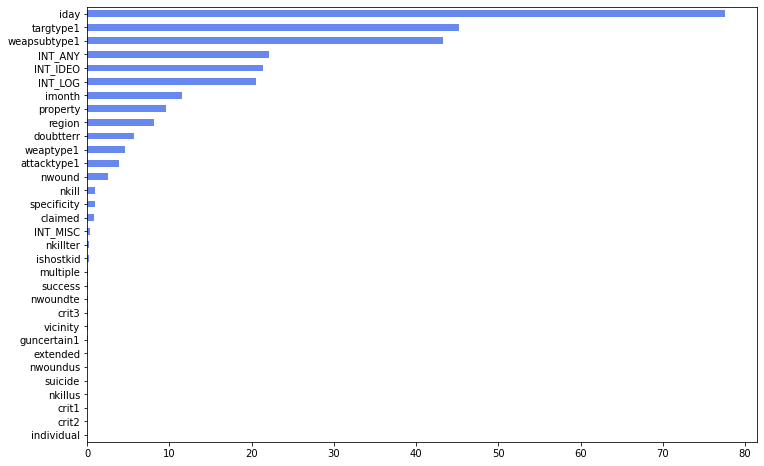

In [42]:
# Sorting columns in descending order of variance
# Choosing columns with good amount of variance.
# Columns with very low variance are not helpful in identifying patterns in the data
c = gt_df_k.count().sort_values().drop([
    'eventid', 'country', 'iyear', 'natlty1', 'longitude', 'latitude', 'targsubtype1'])
_ = gt_df_k[c[c > 100000].keys()].var().sort_values().plot.barh()

In the below code, we have selected features based on their variance and also few extra columns which would help us in visualization

To deal with categorical data, get_dummies has been used which uses one hot encoding for categorical data

In [43]:
features = [
    'longitude',
    'latitude',
    
    'nwound',
    'nkill',
    
    'natlty1_txt',
    'targtype1_txt',
    'targsubtype1_txt',
    'weaptype1_txt',
    'attacktype1_txt',
]

X = pd.get_dummies(gt_df_k[features])
X = X.T[X.var() > 0.05].T.fillna(0)
X = X.fillna(0)

print('Shape:', X.shape)
X.head()

Shape: (159863, 24)


,longitude,latitude,nwound,nkill,natlty1_txt_Afghanistan,natlty1_txt_India,natlty1_txt_Iraq,natlty1_txt_Pakistan,targtype1_txt_Business,targtype1_txt_Government (General),...,targsubtype1_txt_Unnamed Civilian/Unspecified,weaptype1_txt_Explosives,weaptype1_txt_Firearms,weaptype1_txt_Incendiary,weaptype1_txt_Unknown,attacktype1_txt_Armed Assault,attacktype1_txt_Assassination,attacktype1_txt_Bombing/Explosion,attacktype1_txt_Facility/Infrastructure Attack,attacktype1_txt_Hostage Taking (Kidnapping)
0,-69.951164,18.456792,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
1,-99.086624,19.371887,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
2,120.599741,15.478598,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
3,-89.176269,37.005105,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
4,-56.187214,-34.891151,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


In [44]:
# X_full = X_full[['longitude', 'latitude', 'nwound', 'nkill', 'natlty1_txt_Afghanistan',
#                  'natlty1_txt_India', 'natlty1_txt_Iraq', 'natlty1_txt_Pakistan',
#                  'targtype1_txt_Business', 'targtype1_txt_Government (General)',
#                  'targtype1_txt_Military', 'targtype1_txt_Police',
#                  'targtype1_txt_Private Citizens & Property',
#                  'targsubtype1_txt_Police Security Forces/Officers',
#                  'targsubtype1_txt_Unnamed Civilian/Unspecified',
#                  'weaptype1_txt_Explosives', 'weaptype1_txt_Firearms',
#                  'weaptype1_txt_Incendiary', 'weaptype1_txt_Unknown',
#                  'attacktype1_txt_Armed Assault', 'attacktype1_txt_Assassination',
#                  'attacktype1_txt_Bombing/Explosion',
#                  'attacktype1_txt_Facility/Infrastructure Attack',
#                  'attacktype1_txt_Hostage Taking (Kidnapping)']]
# X_full['region_txt'] = gt_df_k['region_txt']

# X = X_full.head(115000)
# y = X_full.tail(44863)

# print('Shape of X:', X.shape)
# print('Shape of y:', y.shape)

### 2. K-Means Clustering

We now do K-means Clustering on our identified features of interest. Firstly, we find the optimal k value via the 'ELBOW' method which we find to be equal to eleven.

In [45]:
scores = {}
for k in range(2, 25):
    print(k, end = ', ')
    scores[k] = KMeans(n_clusters = k).fit(X).score(X)
_ = pd.Series(scores).plot.bar()

2, 

AttributeError: 'NoneType' object has no attribute 'split'

In [36]:
error = []
for i in range(2, 25):
    model = KMeans(n_clusters=i)
    model.fit(X)
    error.append(model.inertia_)
    print(str(i)+', ', end='')
plt.plot(range(2, 25), error)
plt.show()

AttributeError: 'NoneType' object has no attribute 'split'

The silhouette value is a measure of how similar an object is to its own cluster (cohesion) compared to other clusters (separation). The silhouette ranges from −1 to +1, where a high value indicates that the object is well matched to its own cluster and poorly matched to neighboring clusters and low value indicates a bad clustering

We then get the cluster labels and compute the silhouette score of our clustering. A score of ~60% would suffice in our case.

In [69]:
gt_df_k['Cluster'] = KMeans(n_clusters = 20).fit_predict(X) + 1
print('Silhouette Score:', silhouette_score(X, gt_df_k['Cluster'], sample_size = 10000) * 10000 // 1 / 100, '%')

Silhouette Score: 55.13 %


Given the huge dataset where in the regions are very close to each other, a score of 55.13% would suffice

### 3. Profiling

Now, we profile each cluster. We name each cluster by each dominant region lying within it. Then we look for interesting mean values that stand out in our heatmap (after scaling the variables).

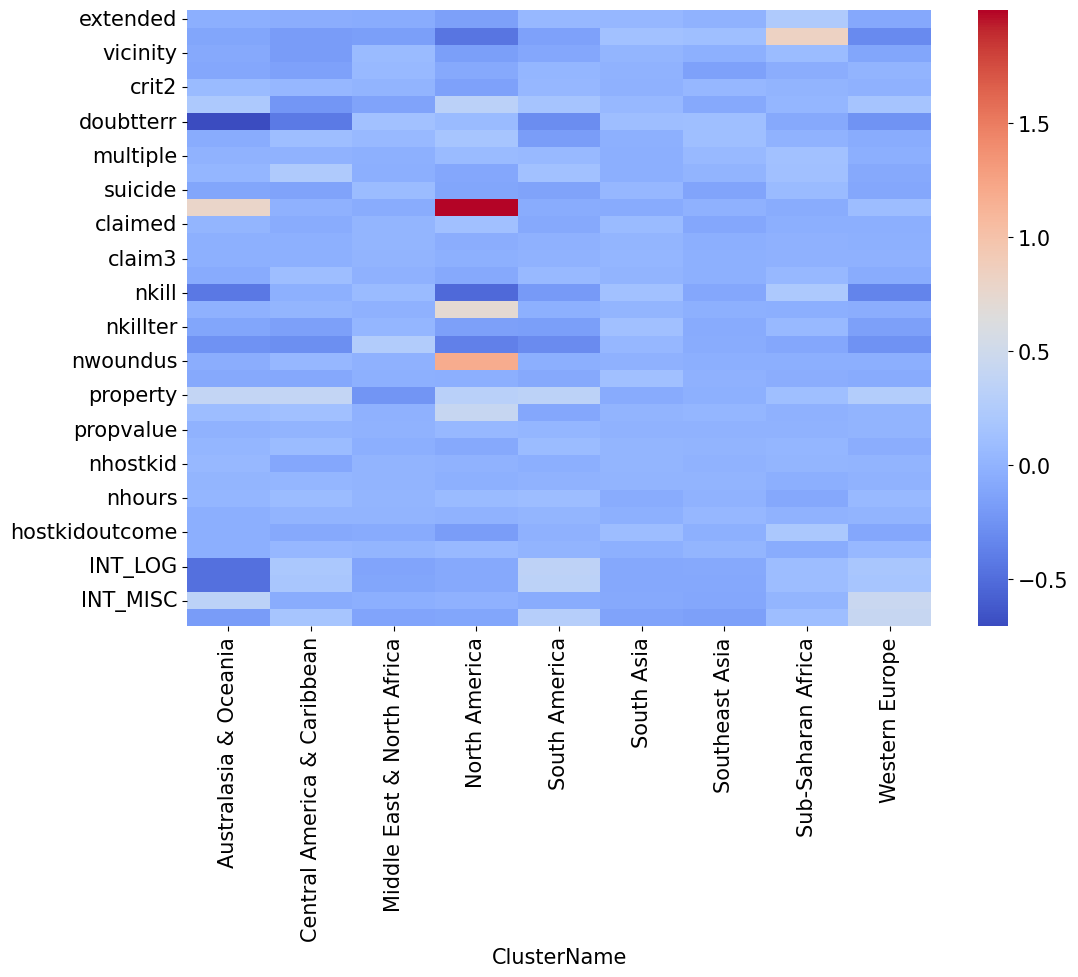

In [70]:
# Naming the cluster with the dominant region which is lying in that cluster
names = gt_df_k.groupby('Cluster')['region_txt'].describe()['top'].values
gt_df_k['ClusterName'] = gt_df_k['Cluster'].apply(lambda c: names[c - 1])

numerical = gt_df_k.dtypes[gt_df_k.dtypes != 'object'].keys()
exclude = [
            'eventid', 'Cluster', 'region', 'country', 'iyear', 
            'natlty1', 'natlty2', 'natlty3', 'imonth', 'iday',
            'guncertain1', 'guncertain2', 'guncertain3'
        ] + [col for col in numerical if 'type' in col or 'mode' in col or 'ransom' in col]

# Choosing numerical columns and excluding few features whcih are not helpful
X_profiling = gt_df_k[numerical.drop(exclude)].fillna(0)
X_profiling = pd.DataFrame(scale(X_profiling), columns = X_profiling.columns)
X_profiling['ClusterName'] = gt_df_k['ClusterName']
#_ = sns.heatmap(X_profiling.groupby('ClusterName').mean().drop(['longitude', 'latitude'], axis = 1).T, cmap = 'coolwarm')

In the above plot, we see that we have got 11 clusters. We will do the visualizations at  the end

The below plot is the world plot of the clusters that has been formed by k-means clustering

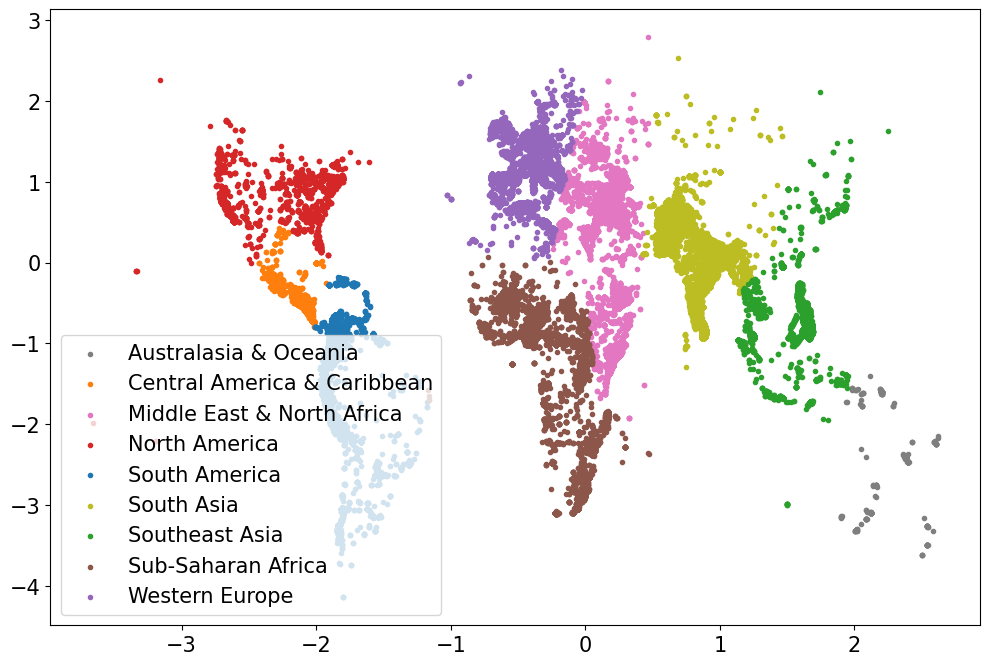

In [71]:
# Getting unique Cluster names and using them for world plot
ckeys = gt_df_k['ClusterName'].unique()
ckeys = dict(zip(ckeys, plt.cm.tab10(range(len(ckeys)))))

# Plotting world map by using longitude and latitude
for i, x in X_profiling.groupby('ClusterName'):
    _ = plt.scatter(x['longitude'], x['latitude'], c = ckeys[i], marker = '.', cmap = 'tab10', label = i)
_ = plt.legend(loc = 3)

The below plot is the world plot of the actual regions

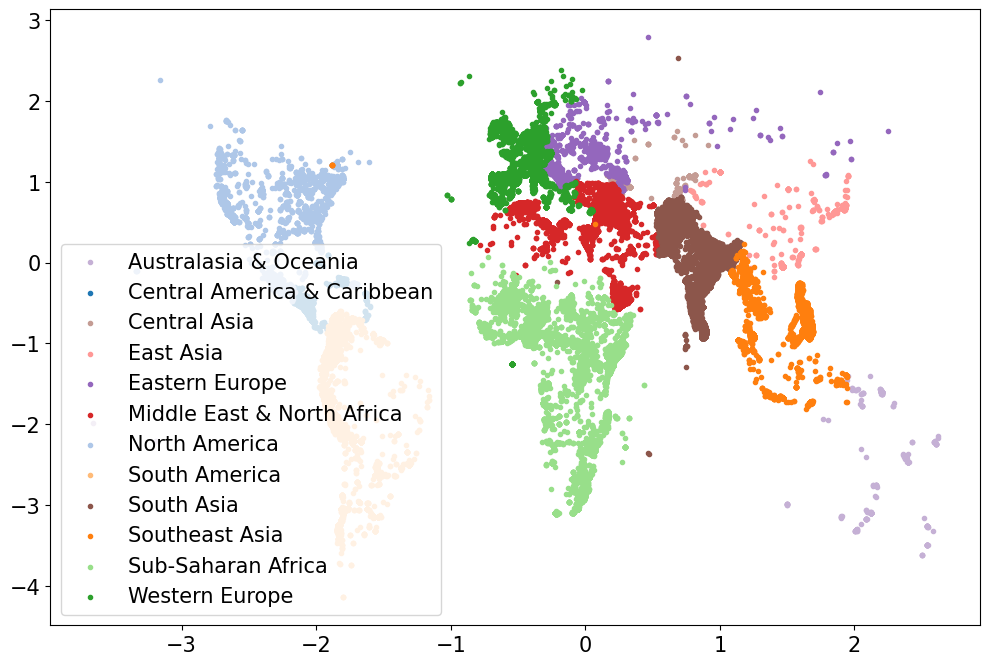

In [72]:
# Getting unique regions to plot them
ckeys = gt_df_k['region_txt'].unique()
ckeys = dict(zip(ckeys, plt.cm.tab20(range(len(ckeys)))))

# Plotting world map by using longitude and latitude
for i, x in pd.concat([X_profiling, gt_df_k['region_txt']], axis = 1).groupby('region_txt'):
    _ = plt.scatter(x['longitude'], x['latitude'], c = ckeys[i], marker = '.', cmap = 'tab10', label = i)
_ = plt.legend(loc = 3)

### ----------------------------------------------------------- ACCURACY---------------------------------------------------------------

In [73]:
print('Similarity between cluster and region labels:', 
      len(gt_df_k[gt_df_k['region_txt'] == gt_df_k['ClusterName']]) / len(gt_df_k) * 10000 // 1 / 100, '%')

Similarity between cluster and region labels: 88.15 %


##### We see that we have obtained an accuracy of around 90% which is good considering the fact that the regions are very close to each oher

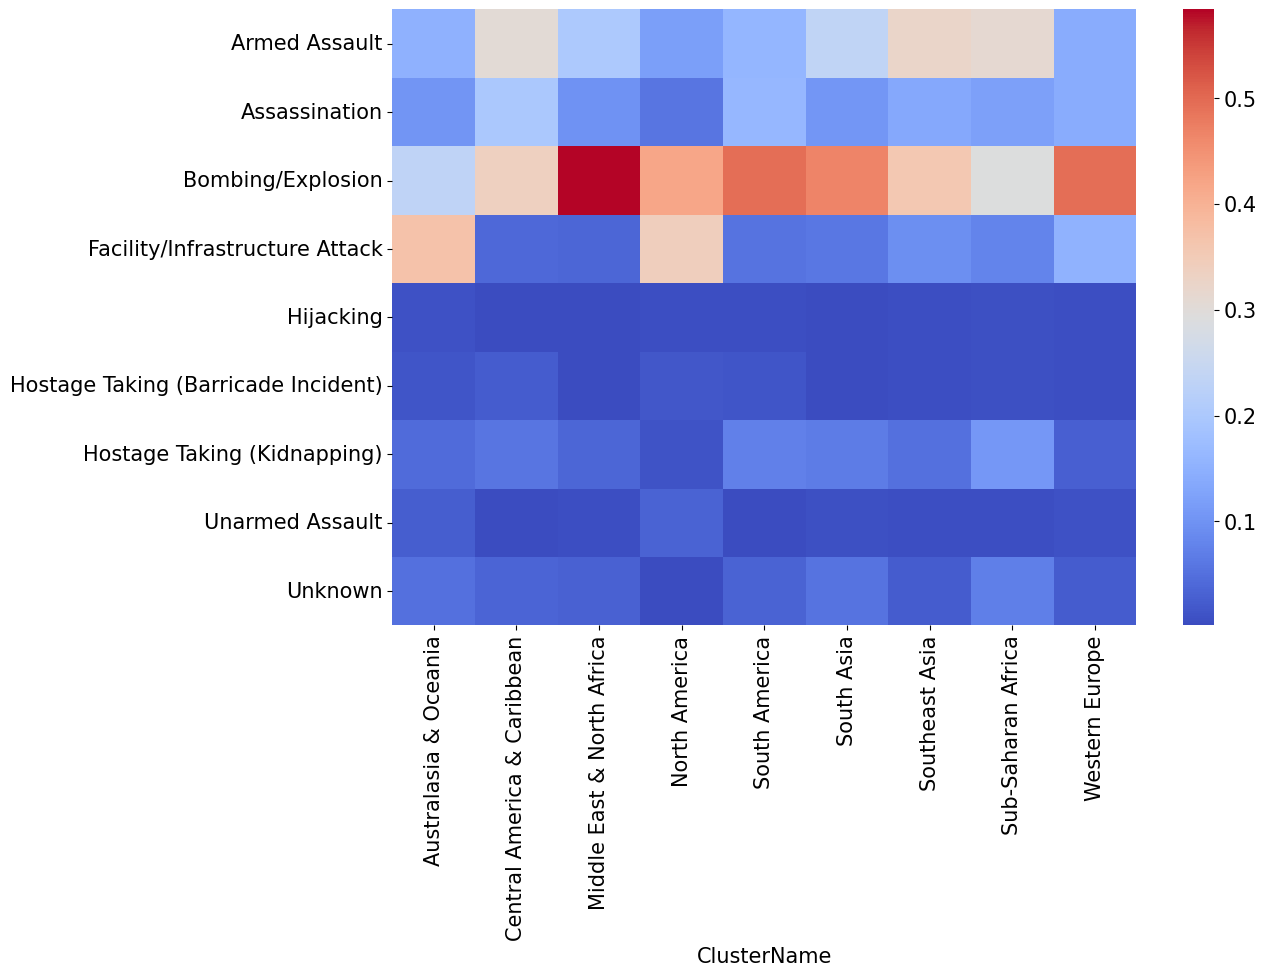

In [74]:
# Drawing a heatmap of Cluster Name versus Attack type

# Grouping by cluster to plot the heatmap
d = pd.get_dummies(gt_df_k['attacktype1_txt'])
d['ClusterName'] = gt_df_k['ClusterName']
_ = sns.heatmap(d.groupby('ClusterName').mean().T, cmap='coolwarm')

##### From the above plot, we see that Bombing / Explosion is the most common method used by the terrorists in majority of the clusters.

##### But in few clusters like Australi and Oceania, Facility / Infrastructure Attack is more common. Armed Assault is used the most in Sub-Saharan Africa

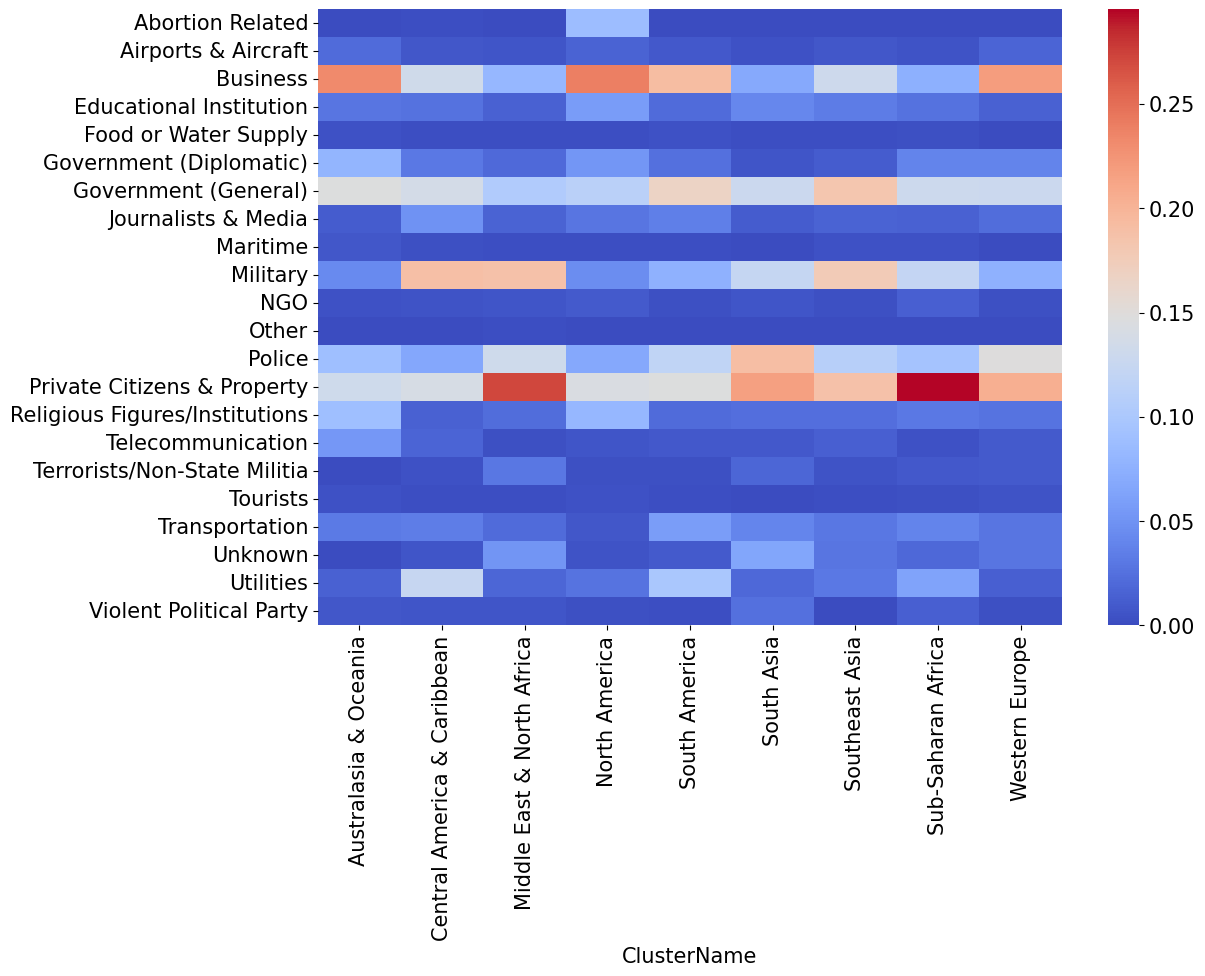

In [75]:
# Drawing a heatmap of Cluster Name versus Target type

# Grouping by cluster to plot the heatmap
d = pd.get_dummies(gt_df_k['targtype1_txt'])
d['ClusterName'] = gt_df_k['ClusterName']
_ = sns.heatmap(d.groupby('ClusterName').mean().T, cmap='coolwarm')

##### We see that Private Citizens and property, Business, Military, Police and Government are the most Targeted Types

##### In the African region, we see that Private Citizens and property are the most Targeted types and in regions like America, Australia and Europe, Business is the targeted one.

In [37]:
#d = pd.get_dummies(gt_df_k['weaptype1_txt'])
#d['ClusterName'] = gt_df_k['ClusterName']
#_ = sns.heatmap(d.groupby('ClusterName').mean().T, cmap='coolwarm')

In [38]:
#top_natls = gt_df_k['natlty1_txt'].value_counts().head(20).keys()
#natl = gt_df_k['natlty1_txt'].apply(lambda x: x if x in top_natls else None)
#d = pd.get_dummies(natl)
#d['ClusterName'] = gt_df_k['ClusterName']
#_ = sns.heatmap(d.groupby('ClusterName').mean().T, cmap='coolwarm')

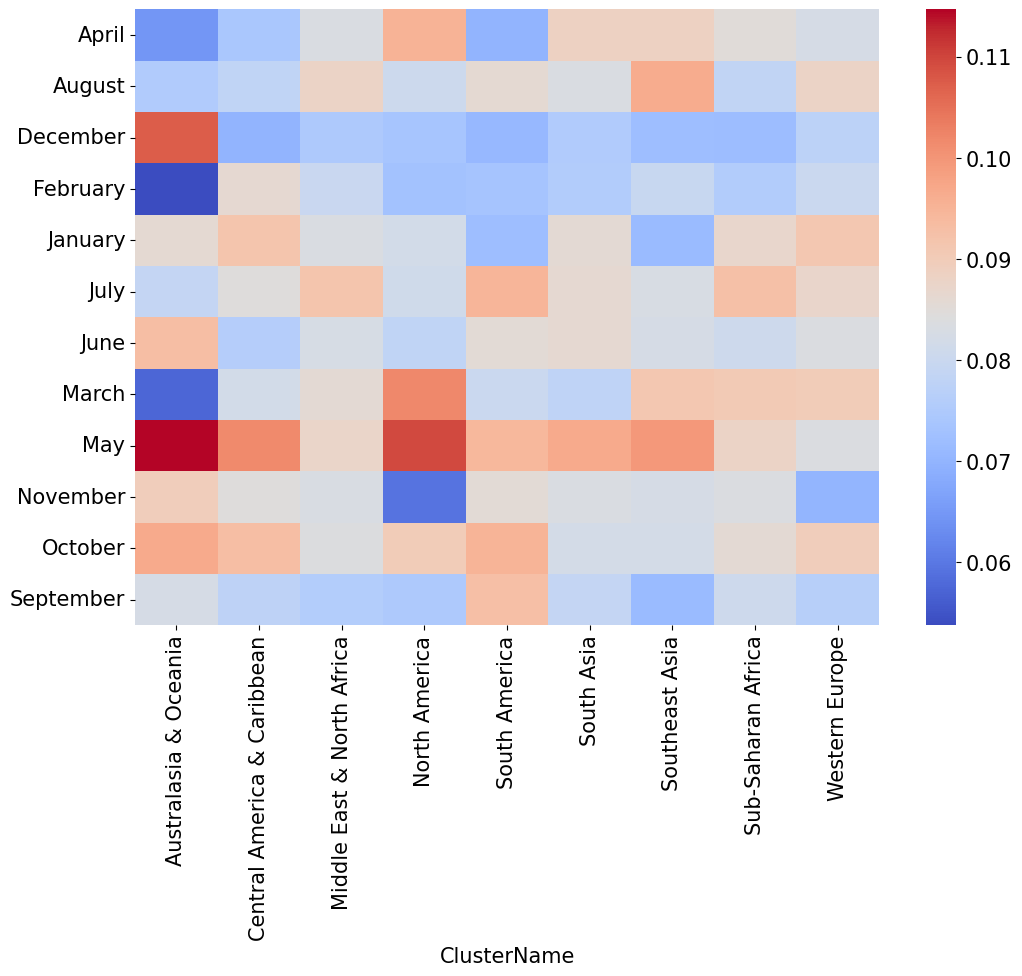

In [79]:
# A heatmap of month vs Cluster name
months = ['', 'January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']
d = pd.get_dummies(gt_df_k['imonth'].apply(lambda x: None if x == 0 else months[int(x)]))
d['ClusterName'] = gt_df_k['ClusterName']
_ = sns.heatmap(d.groupby('ClusterName').mean().T, cmap='coolwarm')

##### It is seen that Australia and Oceania have most of  their attacks in May and December, North America have most of their attacks in the month of May

In [40]:
#d = pd.get_dummies(gt_df_k['iday'].apply(lambda x: None if x == 0 else int(x)))
#d['ClusterName'] = gt_df_k['ClusterName']
#_ = sns.heatmap(d.groupby('ClusterName').mean().T, cmap='coolwarm')

In [39]:
#d = pd.get_dummies(gt_df_k['nhours'].apply(lambda x: None if x <= 0 else x))
#d['ClusterName'] = gt_df_k['ClusterName']
#_ = sns.heatmap(d.groupby('ClusterName').mean().T, cmap='coolwarm')